In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
fhs= glob.glob(f'Data/FLUXNET/FLUXNET2022/*.csv')

# Check gaps in EC data

In [4]:
data_gaps= {}
for fh in fhs:
    station = fh.split('\\')[-1].split('.')[0]
    df = pd.read_csv(fh,parse_dates=True,index_col=0)    
    data_gaps[station]=df.count()*100/len(df)

In [11]:
df_gaps = pd.DataFrame(data_gaps)
df_gaps

AR-TF1      AU-Adr      AU-ASM      AU-Boy      AU-Cpr  \
AaIIi       76.851852   52.777778   86.752137   85.185185   98.379630   
AaIi       100.000000  100.000000  100.000000  100.000000  100.000000   
AaIii       79.629630   56.481481   95.299145   87.500000  100.000000   
AbIIi        0.000000   52.777778   86.752137   85.185185   98.379630   
AbIi         0.000000  100.000000  100.000000  100.000000  100.000000   
AbIii        0.000000   56.481481   95.299145   87.500000  100.000000   
MODIS       33.333333    0.000000   38.461538   83.333333   41.666667   
PMLv2       33.333333    0.000000   38.461538   83.333333   41.666667   
SSEBop      33.333333    0.000000   38.461538   83.333333   41.666667   
WaPORv3L1   33.333333    0.000000   38.461538   83.333333   41.666667   
mask       100.000000         NaN         NaN         NaN         NaN   

               AU-Cum      AU-DaS      AU-Dry      AU-GWW      AU-Lit  ...  \
AaIIi      100.000000   96.666667   86.965812   95.555556   89.236111  ...   
AaIi       100.000000  100.000000  100.000000  100.000000  100.000000  ...   
AaIii      100.000000  100.000000  100.000000  100.000000   94.791667  ...   
AbIIi      100.000000   96.666667   86.965812   95.555556   89.236111  ...   
AbIi       100.000000  100.000000  100.000000  100.000000  100.000000  ...   
AbIii      100.000000  100.000000  100.000000  100.000000   94.791667  ...   
MODIS       55.555556   33.333333   38.461538   50.000000   62.500000  ...   
PMLv2       55.555556   33.333333   38.461538   50.000000   62.500000  ...   
SSEBop      55.555556   33.333333   38.461538   50.000000   62.500000  ...   
WaPORv3L1   55.555556   33.333333   38.461538   50.000000   62.500000  ...   
mask              NaN         NaN         NaN         NaN         NaN  ...   

           US-xSJ      US-xSL      US-xSR      US-xST      US-xTA      US-xTR  \
AaIIi        75.0   68.518519   68.888889   85.000000   80.555556   87.222222   
AaIi        100.0  100.000000  100.000000  100.000000  100.000000  100.000000   
AaIii       100.0  100.000000   87.777778   87.777778   87.777778   89.444444   
AbIIi        75.0   68.518519   68.888889   85.000000   80.555556   87.222222   
AbIi        100.0  100.000000  100.000000  100.000000   99.444444  100.000000   
AbIii       100.0  100.000000   87.777778   87.777778   87.777778   89.444444   
MODIS       100.0  100.000000   80.000000   80.000000   80.000000   80.000000   
PMLv2       100.0  100.000000   80.000000   80.000000   80.000000   80.000000   
SSEBop      100.0  100.000000   80.000000   80.000000   80.000000   80.000000   
WaPORv3L1   100.0  100.000000   80.000000   80.000000   80.000000   80.000000   
mask        100.0         NaN         NaN         NaN         NaN         NaN   

               US-xUK      US-xUN     US-xWD      US-xYE  
AaIIi       68.888889   90.555556   79.62963   66.666667  
AaIi       100.000000  100.000000  100.00000  100.000000  
AaIii       89.444444   99.444444  100.00000   82.638889  
AbIIi       68.888889   90.555556   79.62963   66.666667  
AbIi       100.000000  100.000000  100.00000  100.000000  
AbIii       89.444444   99.444444  100.00000   82.638889  
MODIS       80.000000   80.000000  100.00000  100.000000  
PMLv2       80.000000   80.000000  100.00000  100.000000  
SSEBop      80.000000   80.000000  100.00000  100.000000  
WaPORv3L1   80.000000   80.000000  100.00000  100.000000  
mask              NaN         NaN        NaN  100.000000  

[11 rows x 224 columns]

In [13]:
count = (df_gaps.loc['AaIii'] ==100).sum()
count

np.int64(75)

# Compare different post-processed datasets

In [6]:
{'AaIi': 'ONEFlux-LE_F_MSD-DailyAvgLE-Const_lambda',
'AaIii':'ONEFlux-LE_F_MSD-DailyAvgLE-Ta_lambda',
'AbIi':'ONEFlux-LE_CORR-DailyAvgLE-Const_lambda',
'AbIii':'ONEFlux-LE_CORR-DailyAvgLE-Ta_lambda',
'AaIIi':'ONEFlux-LE_F_MSD-AggHourlyET-Const_lambda',
'AbIIi':'ONEFlux-LE_CORR-AggHourlyET-Const_lambda'}

{'AaIi': 'ONEFlux-LE_F_MSD-DailyAvgLE-Const_lambda',
 'AaIii': 'ONEFlux-LE_F_MSD-DailyAvgLE-Ta_lambda',
 'AbIi': 'ONEFlux-LE_CORR-DailyAvgLE-Const_lambda',
 'AbIii': 'ONEFlux-LE_CORR-DailyAvgLE-Ta_lambda',
 'AaIIi': 'ONEFlux-LE_F_MSD-AggHourlyET-Const_lambda',
 'AbIIi': 'ONEFlux-LE_CORR-AggHourlyET-Const_lambda'}

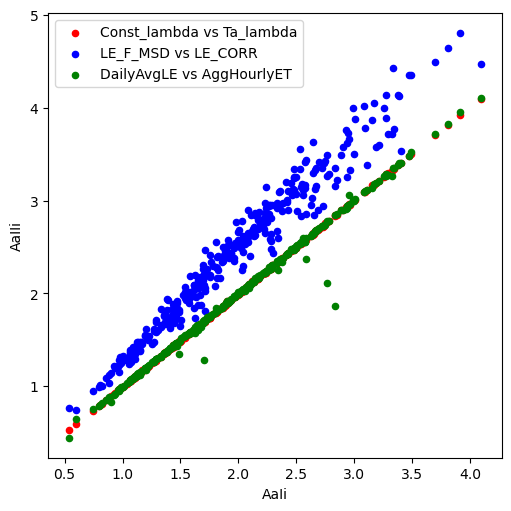

In [32]:
fh=f'Data/FLUXNET/FLUXNET2022/AU-Cum.csv'
df = pd.read_csv(fh,parse_dates=True,index_col=0)   
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),
                        layout="constrained")
df.plot.scatter(x='AaIi',y='AaIii',label='Const_lambda vs Ta_lambda',ax=axs,color='red')
df.plot.scatter(x='AaIi',y='AbIi',label='LE_F_MSD vs LE_CORR',ax=axs,color='blue' )
df.plot.scatter(x='AaIi',y='AaIIi',label='DailyAvgLE vs AggHourlyET',ax=axs,color='green' )
plt.legend()

Data/FLUXNET/FLUXNET2022\AR-TF1.csv


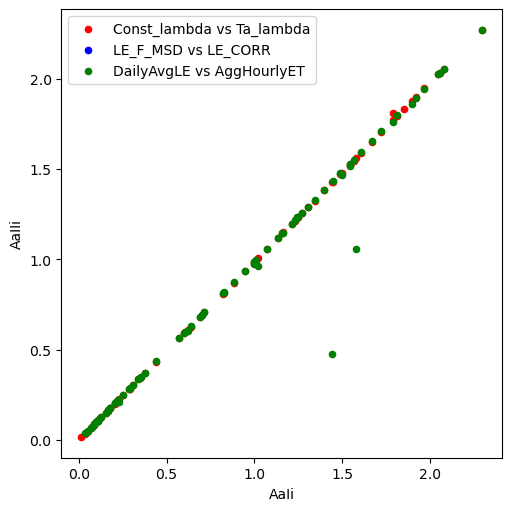

Data/FLUXNET/FLUXNET2022\AU-Adr.csv


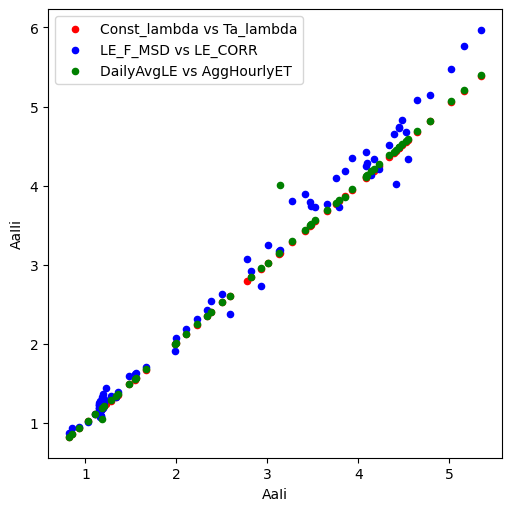

Data/FLUXNET/FLUXNET2022\AU-ASM.csv


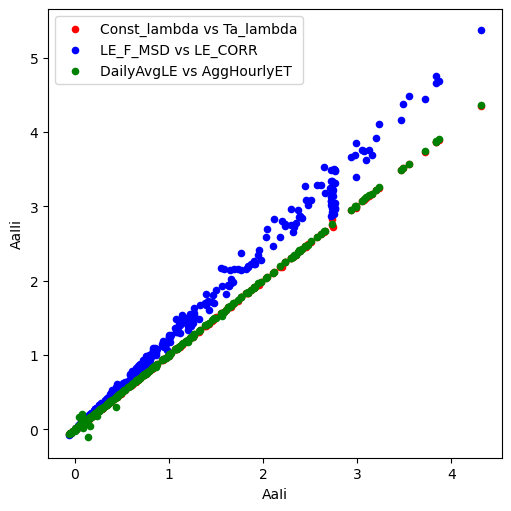

Data/FLUXNET/FLUXNET2022\AU-Boy.csv


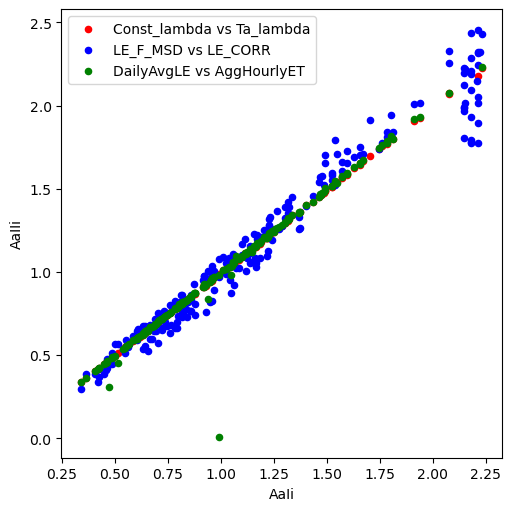

Data/FLUXNET/FLUXNET2022\AU-Cpr.csv


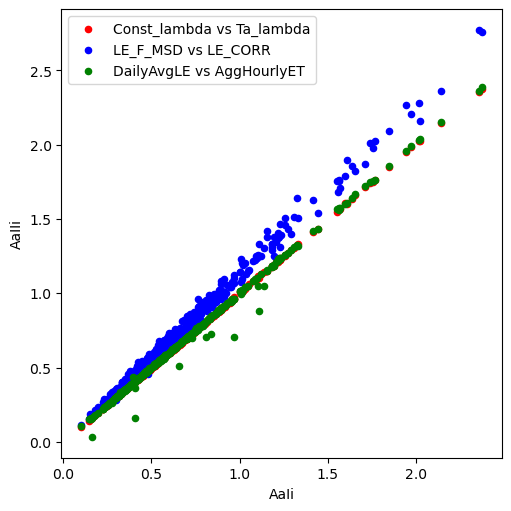

Data/FLUXNET/FLUXNET2022\AU-Cum.csv


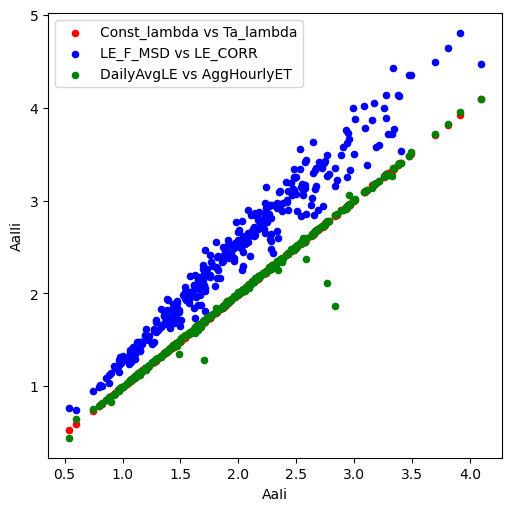

Data/FLUXNET/FLUXNET2022\AU-DaS.csv


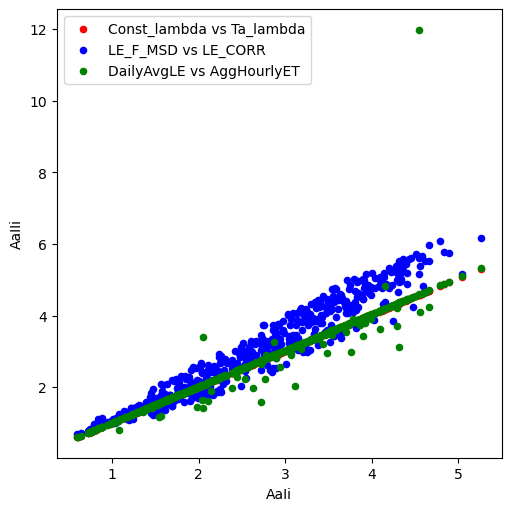

Data/FLUXNET/FLUXNET2022\AU-Dry.csv


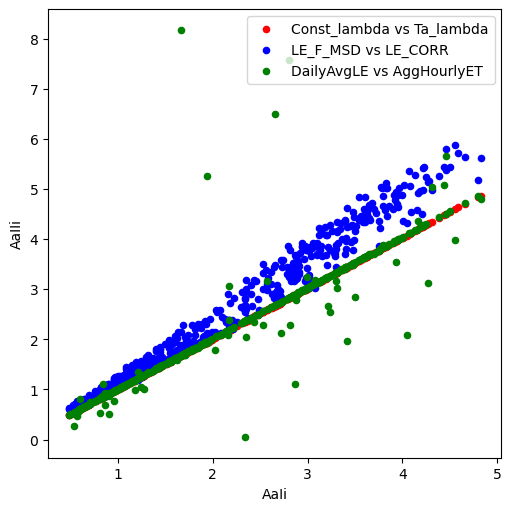

Data/FLUXNET/FLUXNET2022\AU-GWW.csv


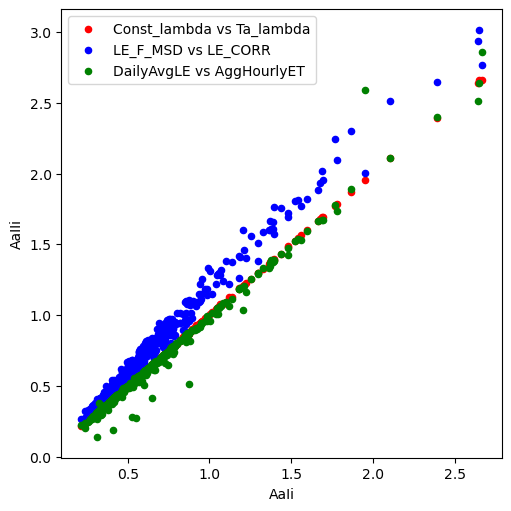

Data/FLUXNET/FLUXNET2022\AU-Lit.csv


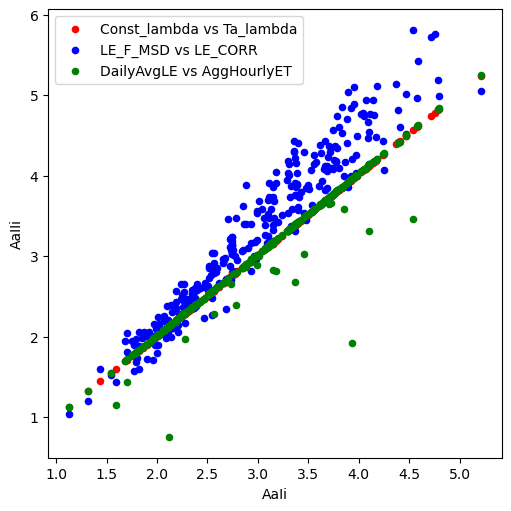

Data/FLUXNET/FLUXNET2022\AU-Lon.csv


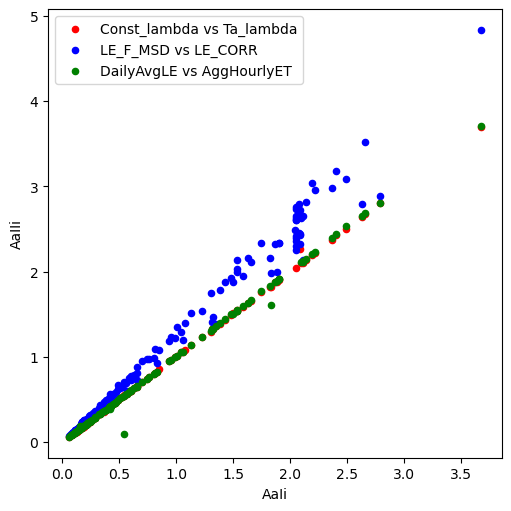

Data/FLUXNET/FLUXNET2022\AU-Rgf.csv


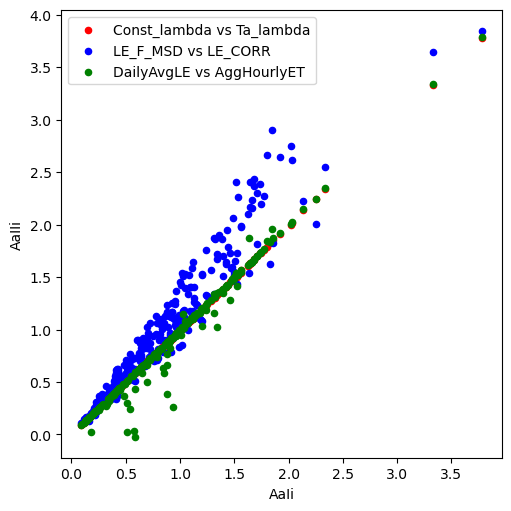

Data/FLUXNET/FLUXNET2022\AU-Stp.csv


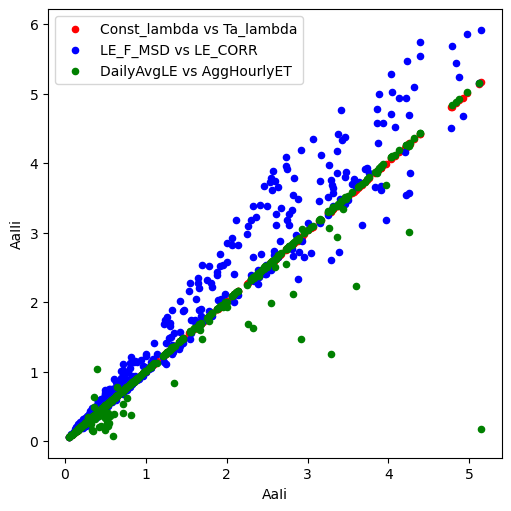

Data/FLUXNET/FLUXNET2022\AU-War.csv


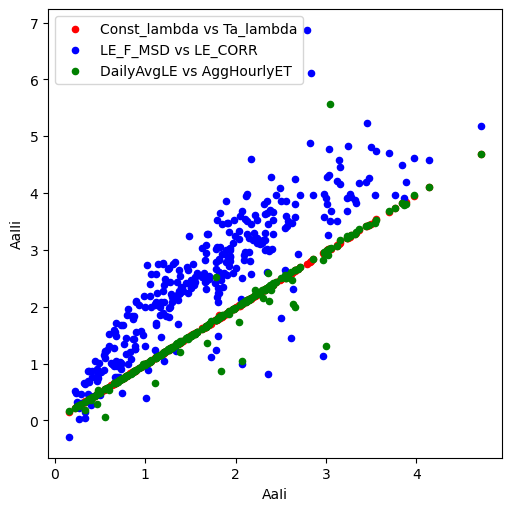

Data/FLUXNET/FLUXNET2022\AU-Whr.csv


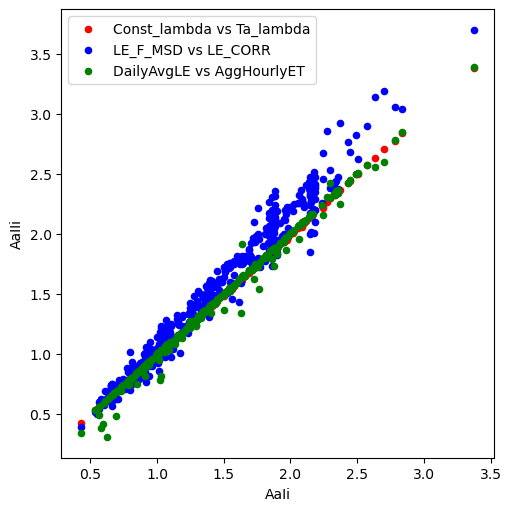

Data/FLUXNET/FLUXNET2022\AU-Wom.csv


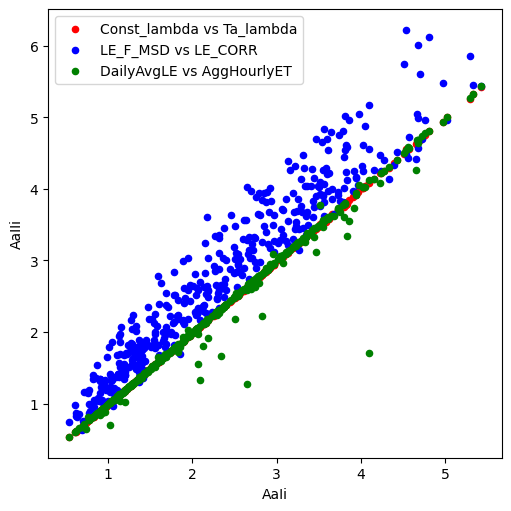

Data/FLUXNET/FLUXNET2022\BE-Bra.csv


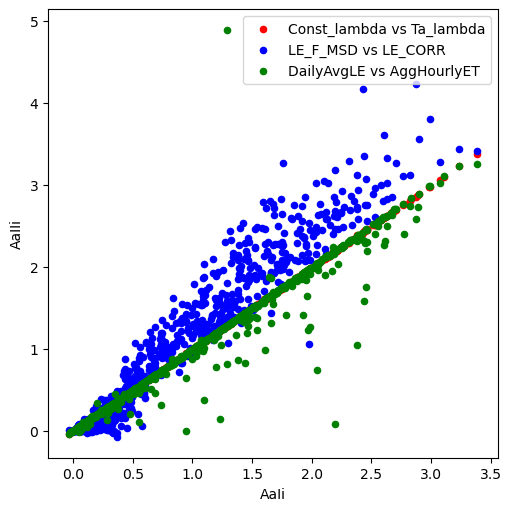

Data/FLUXNET/FLUXNET2022\BE-Dor.csv


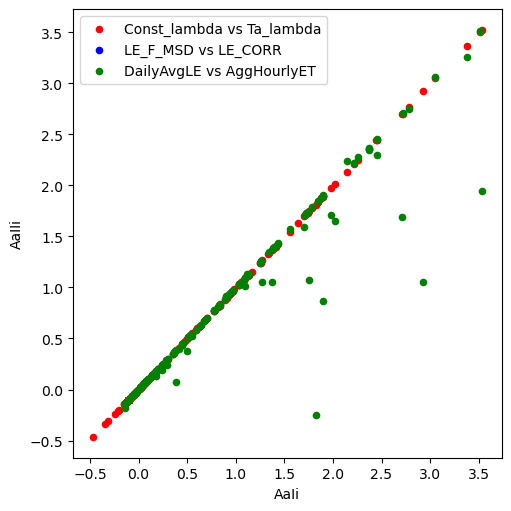

Data/FLUXNET/FLUXNET2022\BE-Lcr.csv


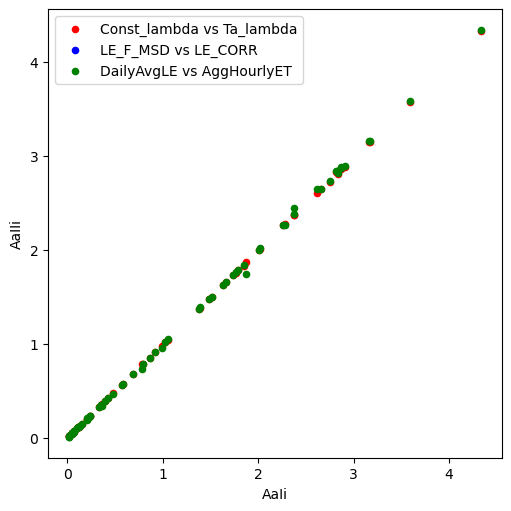

Data/FLUXNET/FLUXNET2022\BE-Lon.csv


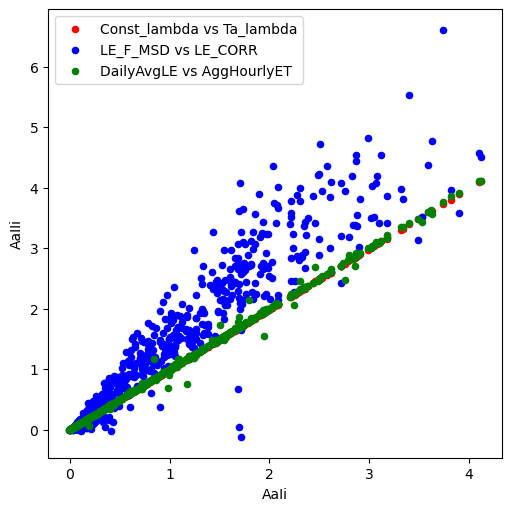

Data/FLUXNET/FLUXNET2022\BE-Maa.csv


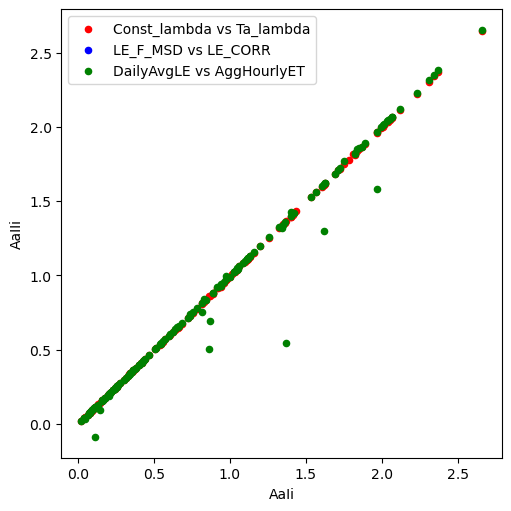

Data/FLUXNET/FLUXNET2022\BE-Vie.csv


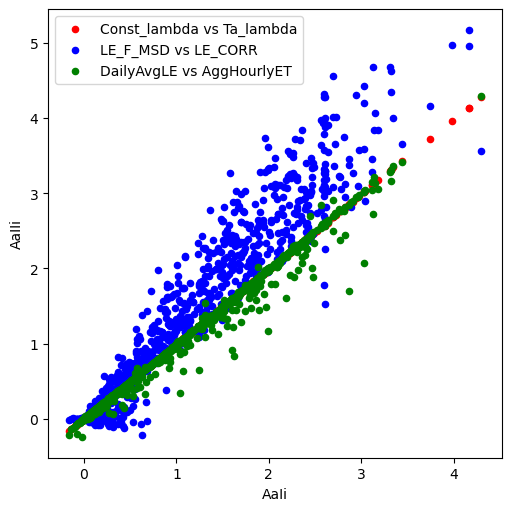

Data/FLUXNET/FLUXNET2022\CA-Cbo.csv


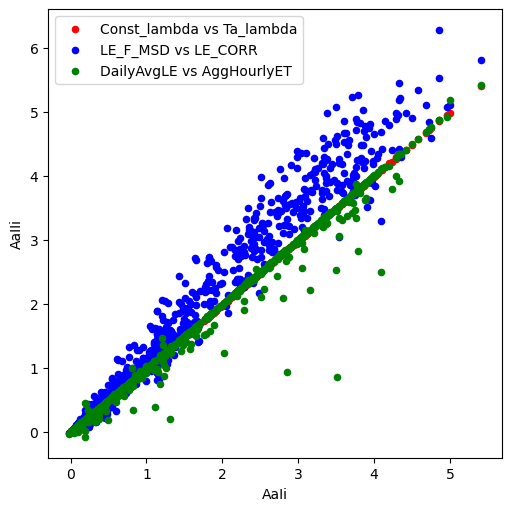

Data/FLUXNET/FLUXNET2022\CA-DB2.csv


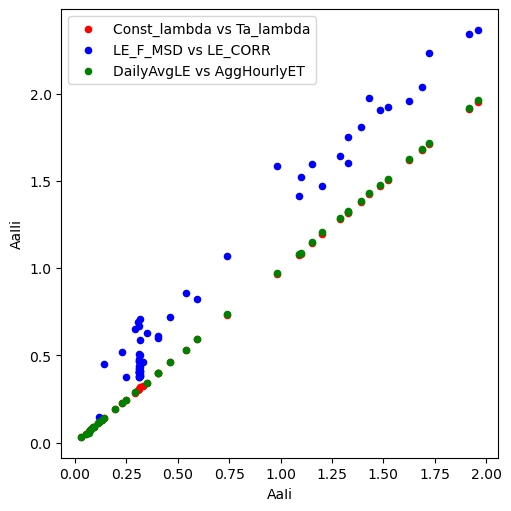

Data/FLUXNET/FLUXNET2022\CA-DBB.csv


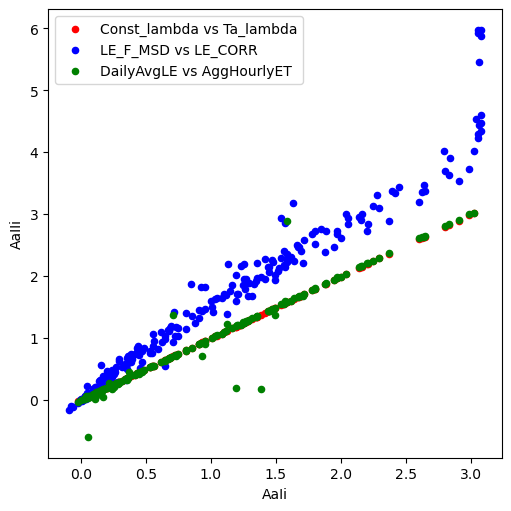

Data/FLUXNET/FLUXNET2022\CA-ER1.csv


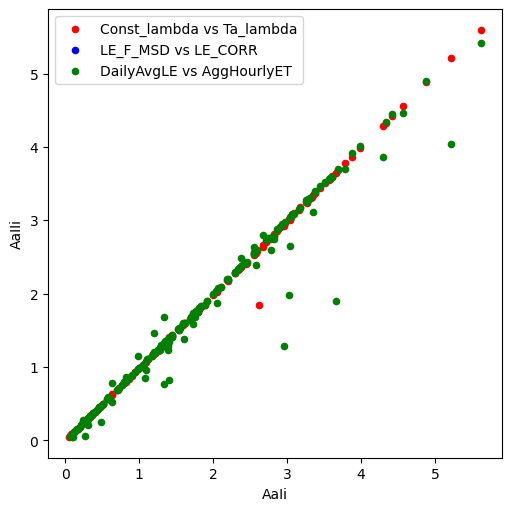

Data/FLUXNET/FLUXNET2022\CA-LP1.csv


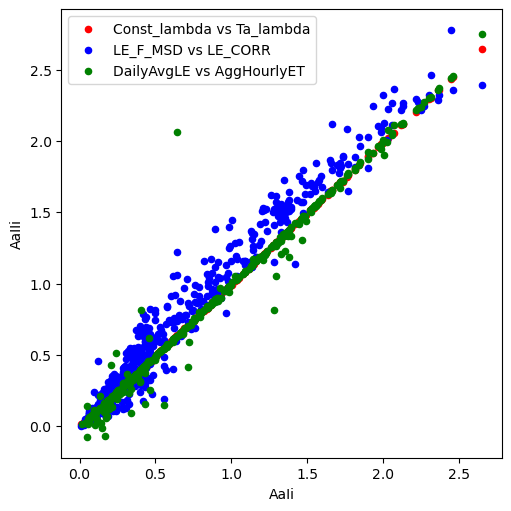

Data/FLUXNET/FLUXNET2022\CH-Aws.csv


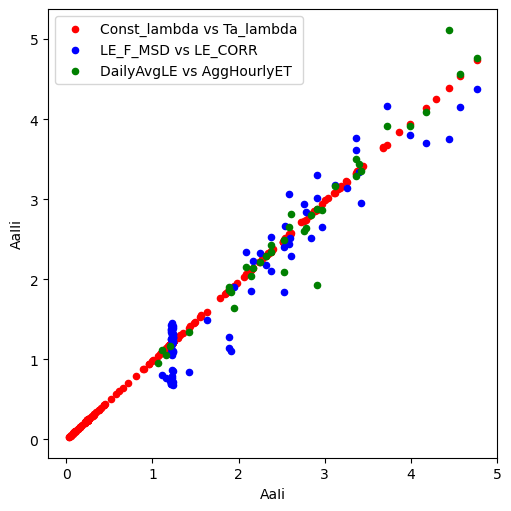

Data/FLUXNET/FLUXNET2022\CH-Cha.csv


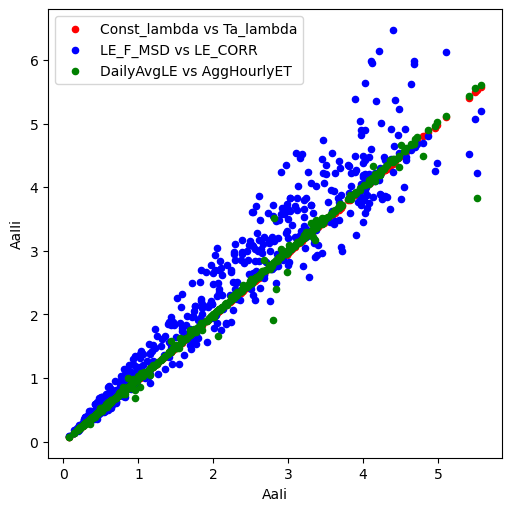

Data/FLUXNET/FLUXNET2022\CH-Dav.csv


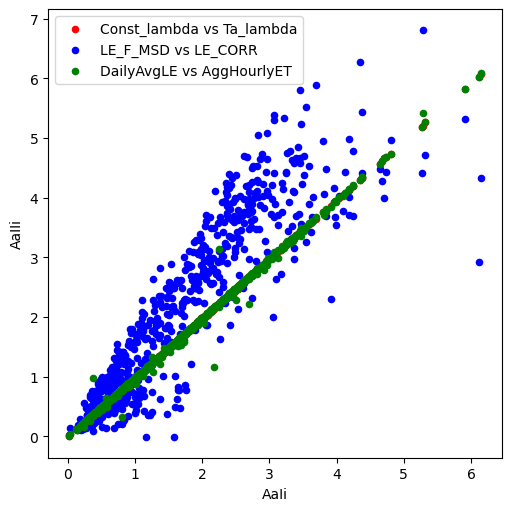

Data/FLUXNET/FLUXNET2022\CH-Fru.csv


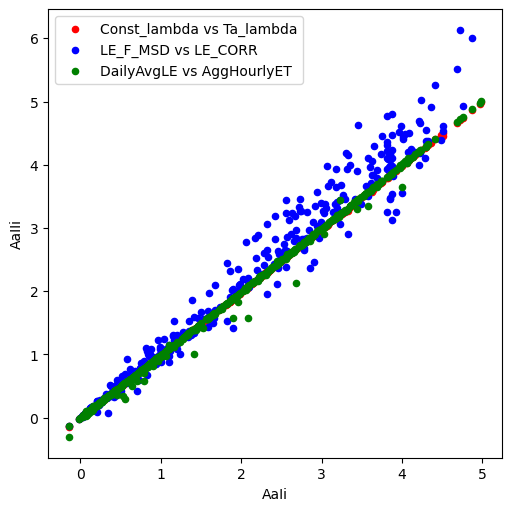

Data/FLUXNET/FLUXNET2022\CH-Lae.csv


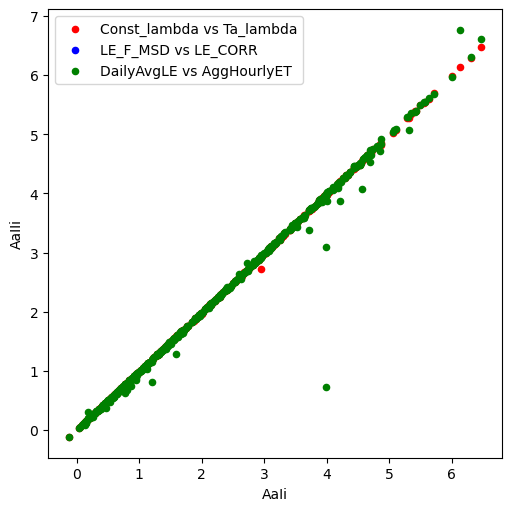

Data/FLUXNET/FLUXNET2022\CH-Oe2.csv


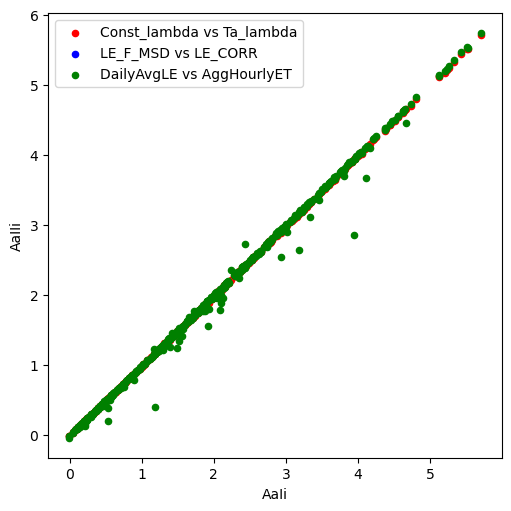

Data/FLUXNET/FLUXNET2022\CZ-BK1.csv


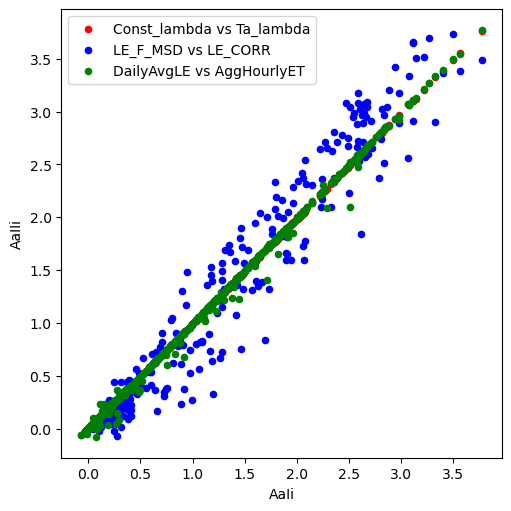

Data/FLUXNET/FLUXNET2022\CZ-KrP.csv


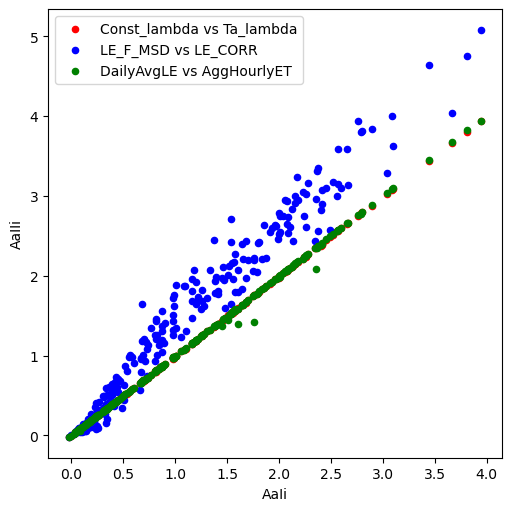

Data/FLUXNET/FLUXNET2022\CZ-Lnz.csv


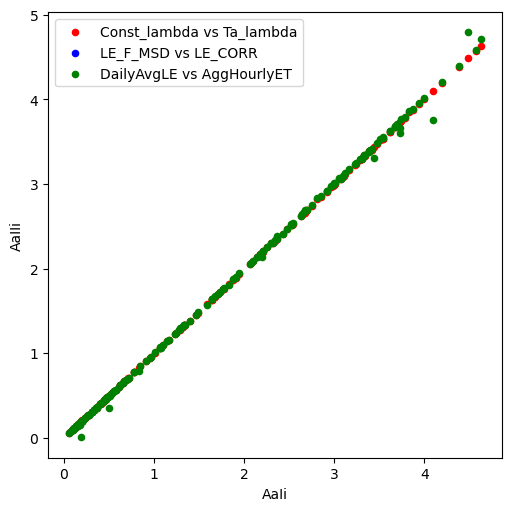

Data/FLUXNET/FLUXNET2022\CZ-RAJ.csv


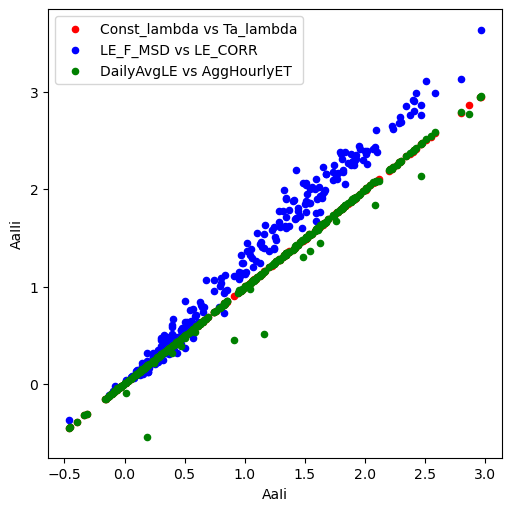

Data/FLUXNET/FLUXNET2022\CZ-Stn.csv


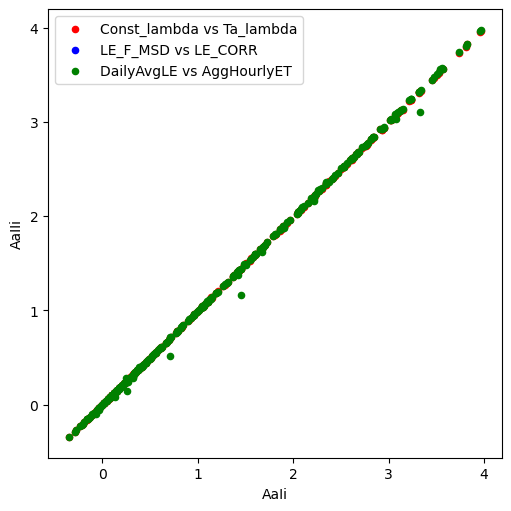

Data/FLUXNET/FLUXNET2022\CZ-wet.csv


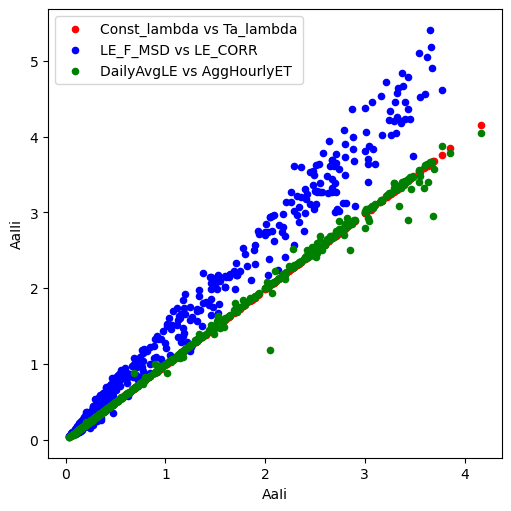

Data/FLUXNET/FLUXNET2022\DE-Akm.csv


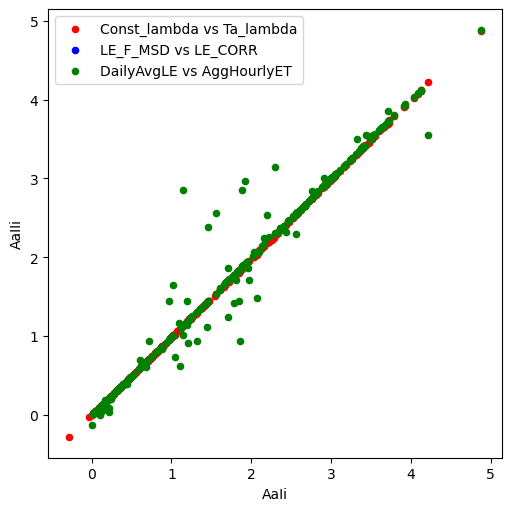

Data/FLUXNET/FLUXNET2022\DE-Geb.csv


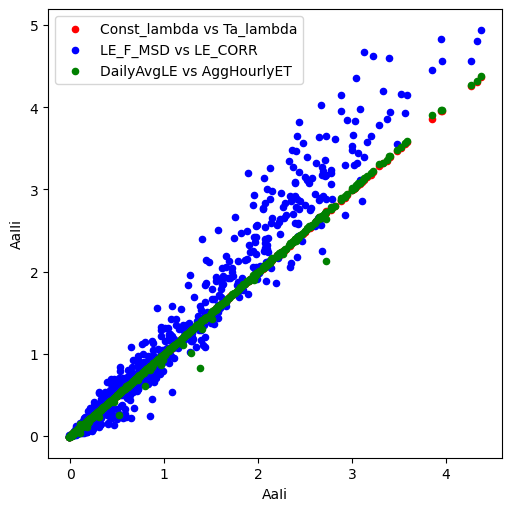

Data/FLUXNET/FLUXNET2022\DE-Gri.csv


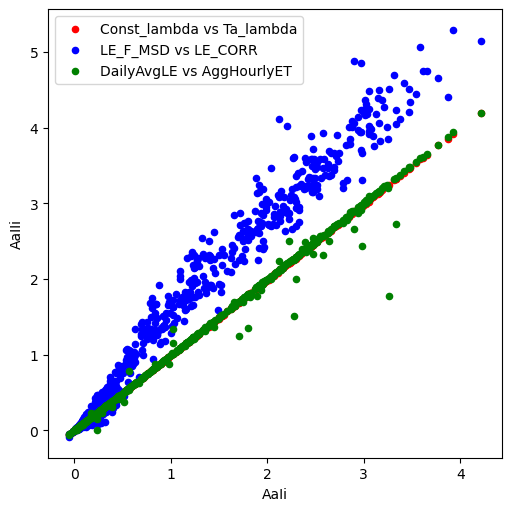

Data/FLUXNET/FLUXNET2022\DE-Hai.csv


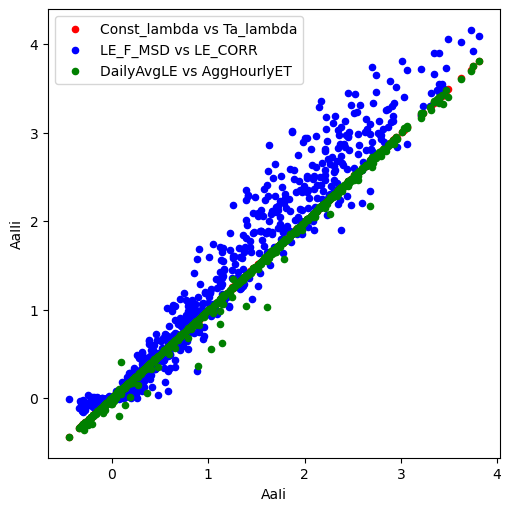

Data/FLUXNET/FLUXNET2022\DE-HoH.csv


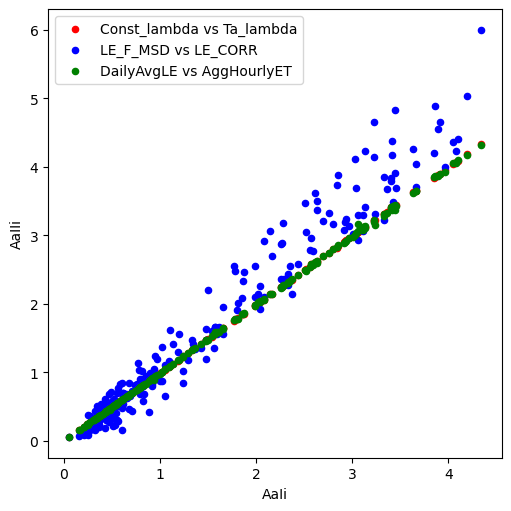

Data/FLUXNET/FLUXNET2022\DE-Hzd.csv


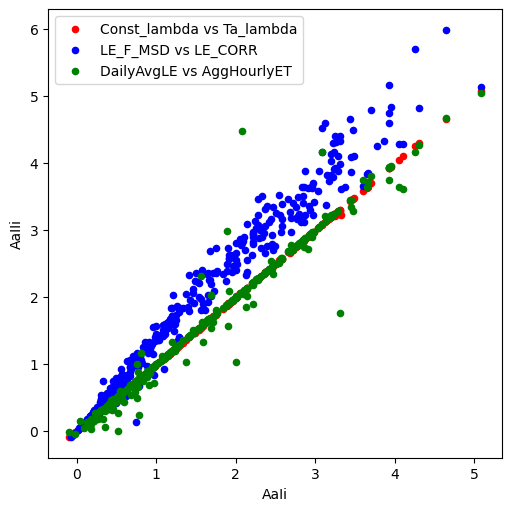

Data/FLUXNET/FLUXNET2022\DE-Kli.csv


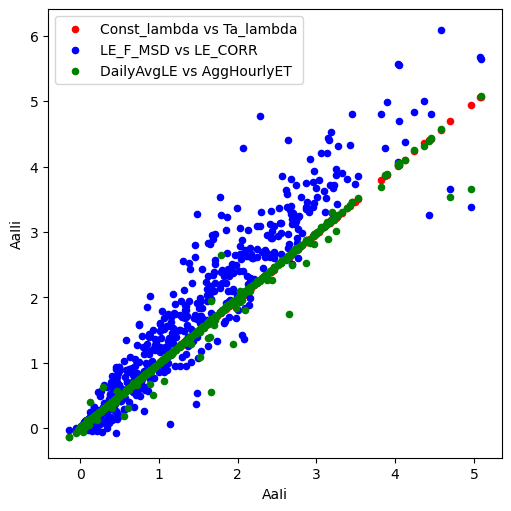

Data/FLUXNET/FLUXNET2022\DE-Obe.csv


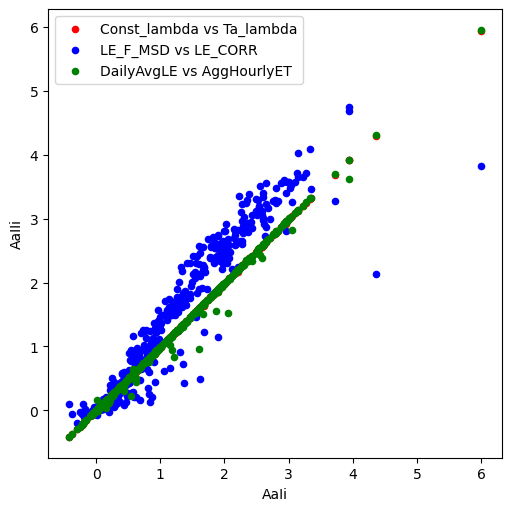

Data/FLUXNET/FLUXNET2022\DE-RuR.csv


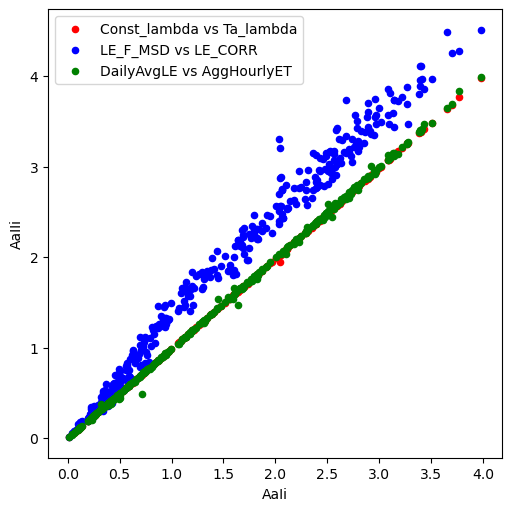

Data/FLUXNET/FLUXNET2022\DE-RuS.csv


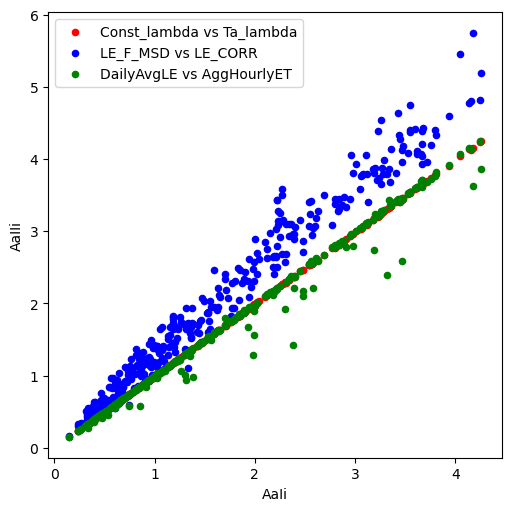

Data/FLUXNET/FLUXNET2022\DE-RuW.csv


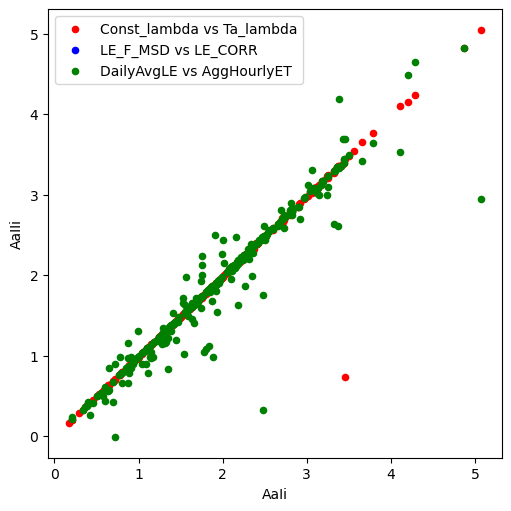

Data/FLUXNET/FLUXNET2022\DE-Tha.csv


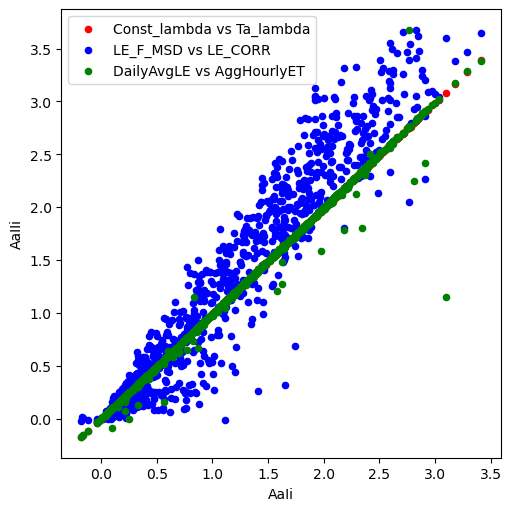

Data/FLUXNET/FLUXNET2022\DK-Gds.csv


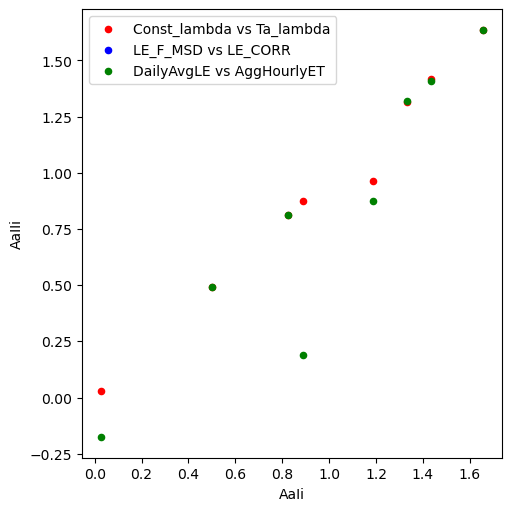

Data/FLUXNET/FLUXNET2022\DK-Sor.csv


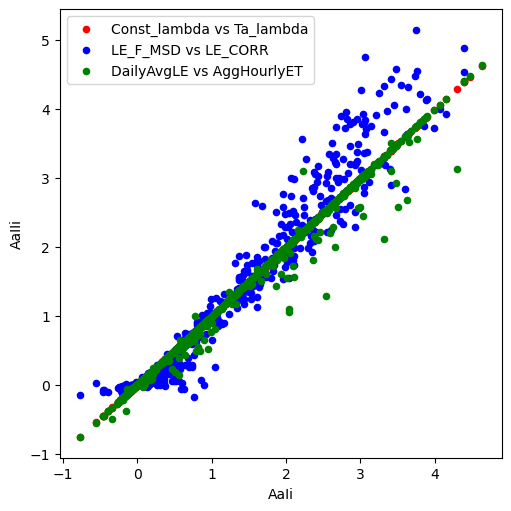

Data/FLUXNET/FLUXNET2022\ES-Abr.csv


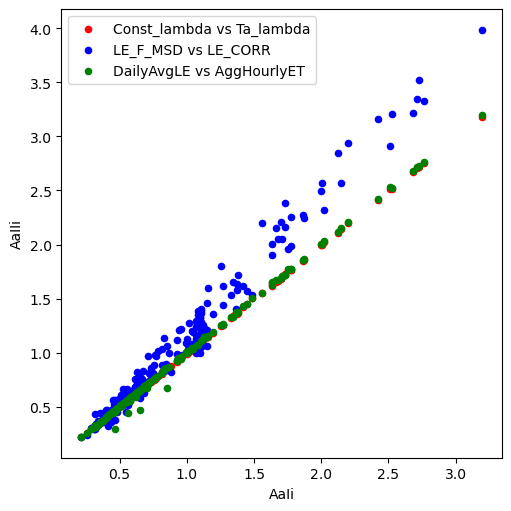

Data/FLUXNET/FLUXNET2022\ES-Agu.csv


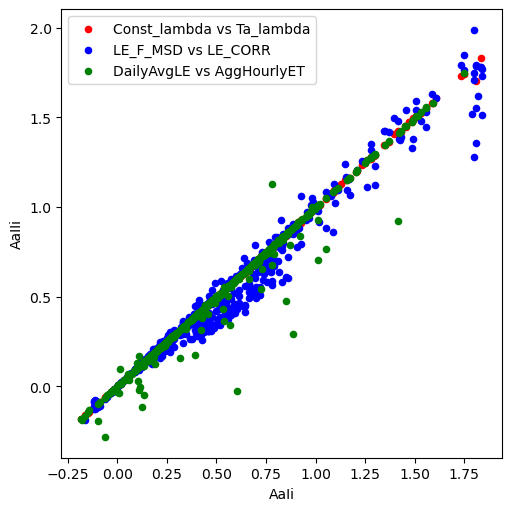

Data/FLUXNET/FLUXNET2022\ES-Cnd.csv


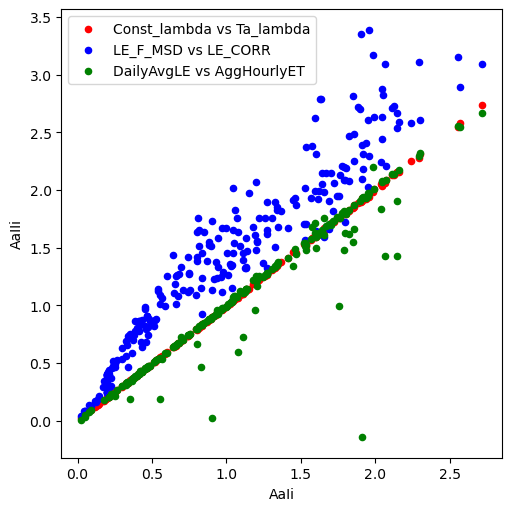

Data/FLUXNET/FLUXNET2022\ES-LJu.csv


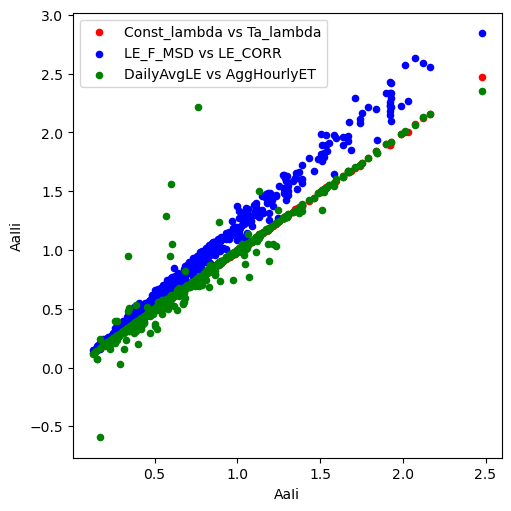

Data/FLUXNET/FLUXNET2022\ES-LM1.csv


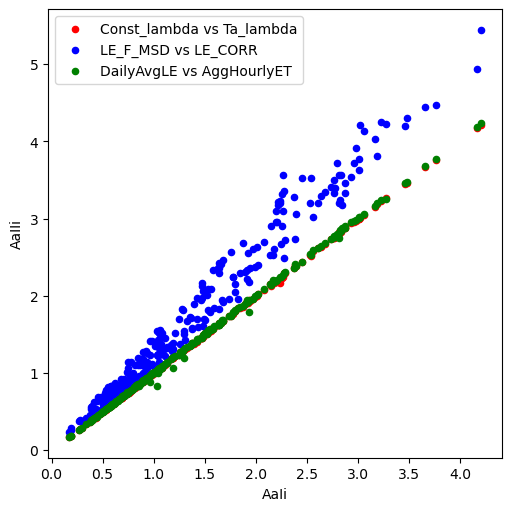

Data/FLUXNET/FLUXNET2022\ES-LM2.csv


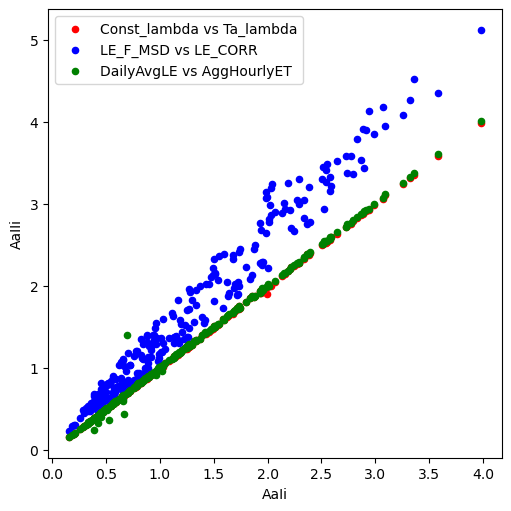

Data/FLUXNET/FLUXNET2022\FI-Hyy.csv


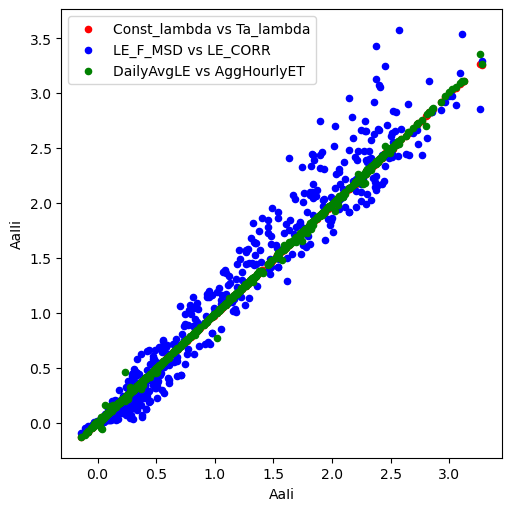

Data/FLUXNET/FLUXNET2022\FI-Ken.csv


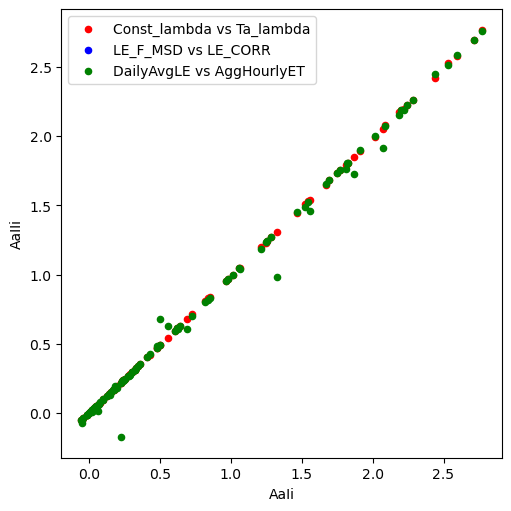

Data/FLUXNET/FLUXNET2022\FI-Let.csv


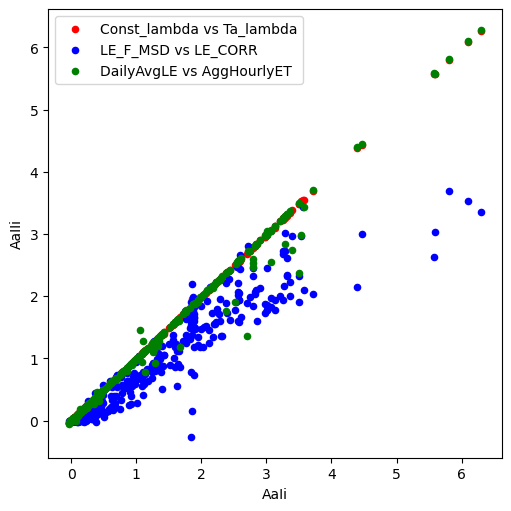

Data/FLUXNET/FLUXNET2022\FI-Qvd.csv


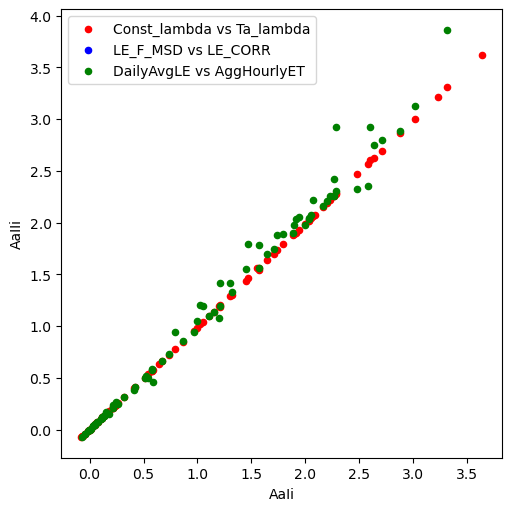

Data/FLUXNET/FLUXNET2022\FI-Sii.csv


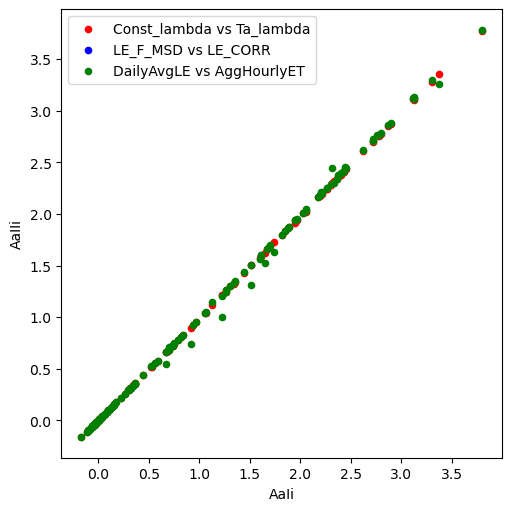

Data/FLUXNET/FLUXNET2022\FI-Var.csv


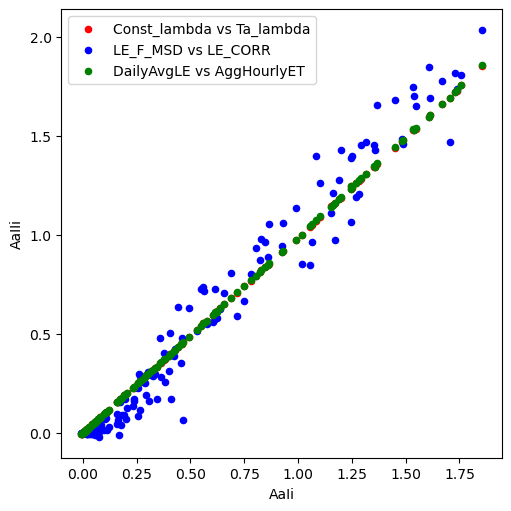

Data/FLUXNET/FLUXNET2022\FR-Aur.csv


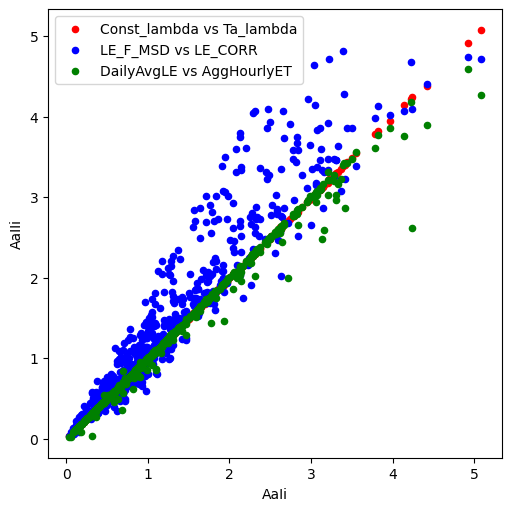

Data/FLUXNET/FLUXNET2022\FR-Bil.csv


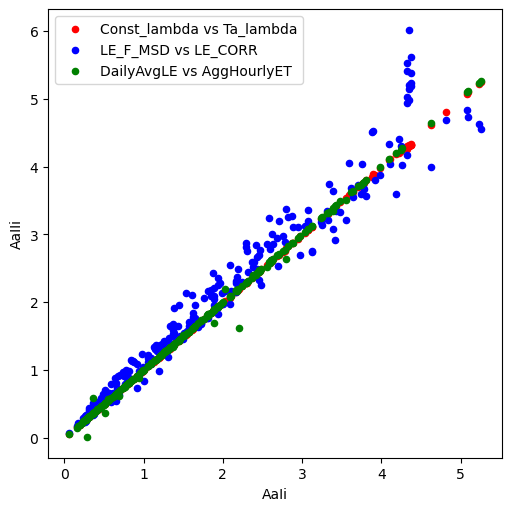

Data/FLUXNET/FLUXNET2022\FR-FBn.csv


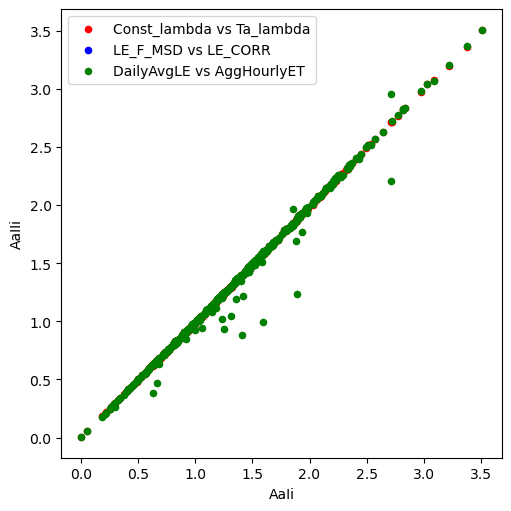

Data/FLUXNET/FLUXNET2022\FR-Fon.csv


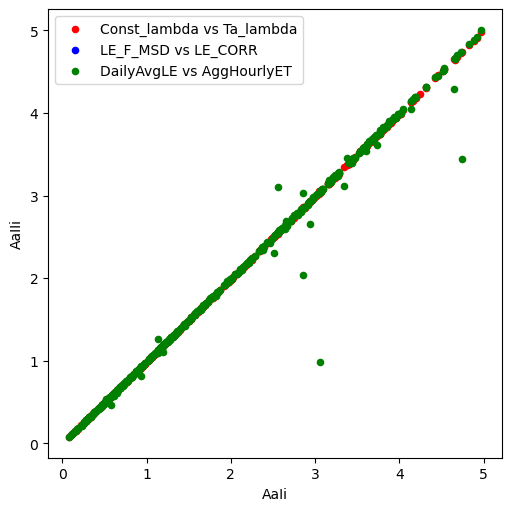

Data/FLUXNET/FLUXNET2022\FR-Gri.csv


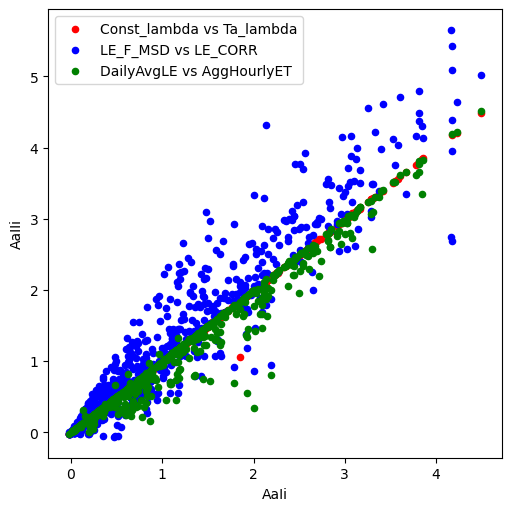

Data/FLUXNET/FLUXNET2022\FR-Hes.csv


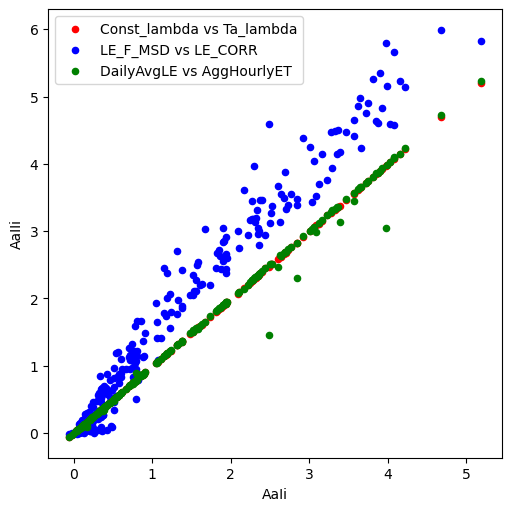

Data/FLUXNET/FLUXNET2022\FR-Lam.csv


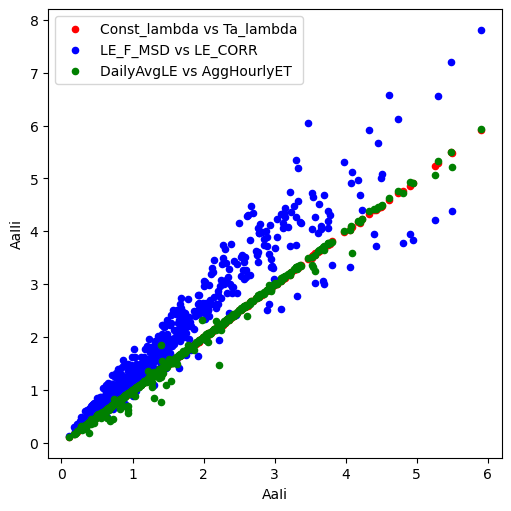

Data/FLUXNET/FLUXNET2022\FR-LGt.csv


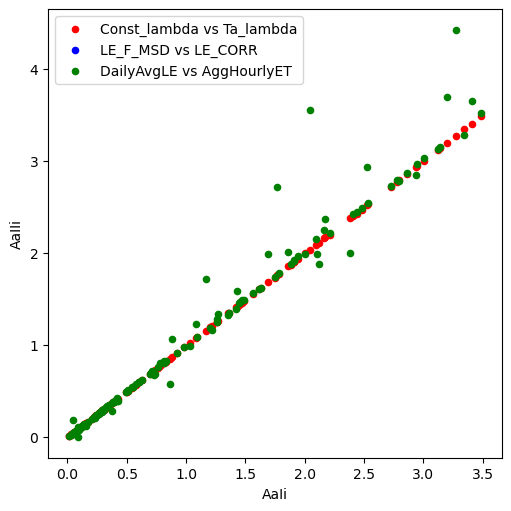

Data/FLUXNET/FLUXNET2022\FR-Tou.csv


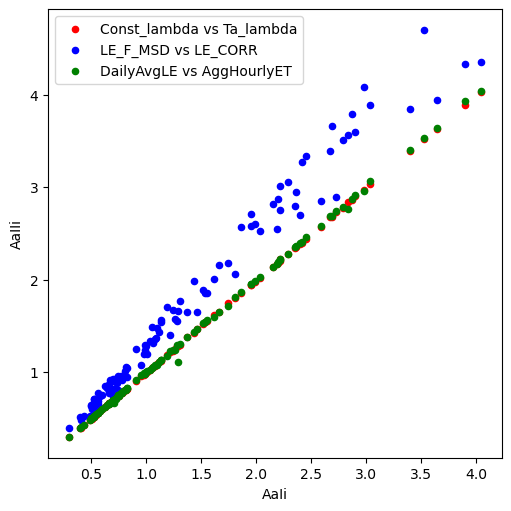

Data/FLUXNET/FLUXNET2022\GF-Guy.csv


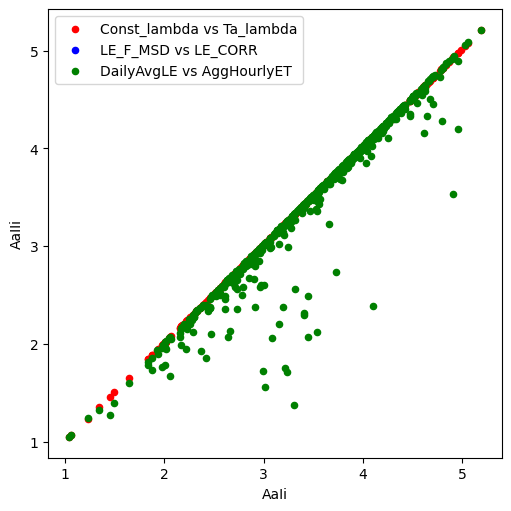

Data/FLUXNET/FLUXNET2022\GL-Dsk.csv


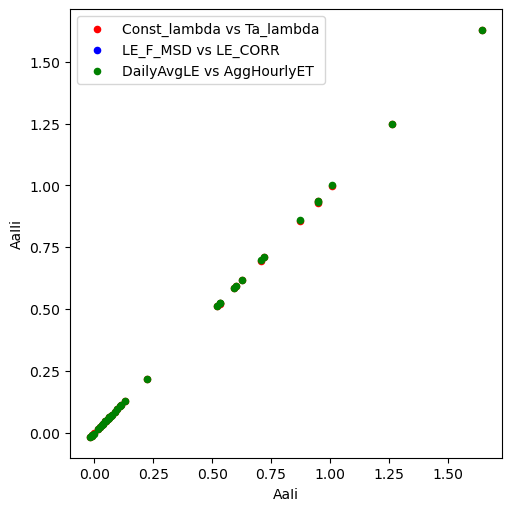

Data/FLUXNET/FLUXNET2022\IE-Cra.csv


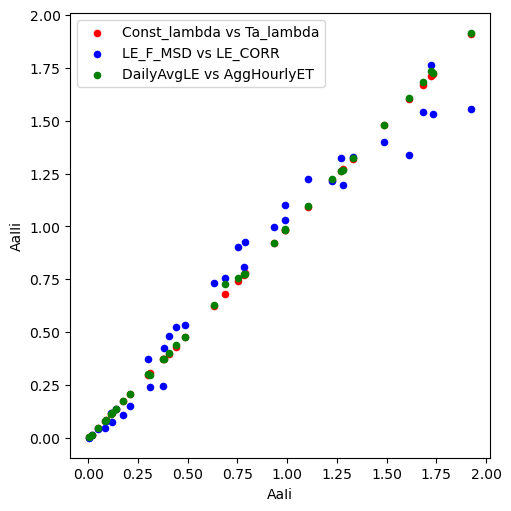

Data/FLUXNET/FLUXNET2022\IL-Yat.csv


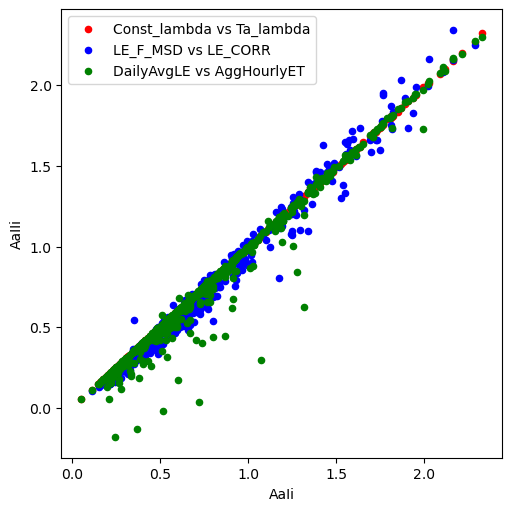

Data/FLUXNET/FLUXNET2022\IT-BCi.csv


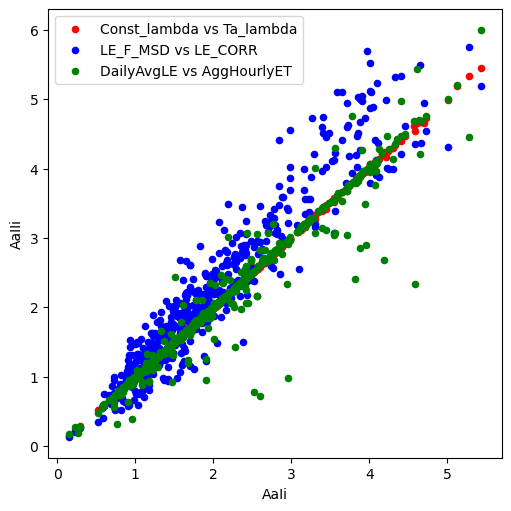

Data/FLUXNET/FLUXNET2022\IT-BFt.csv


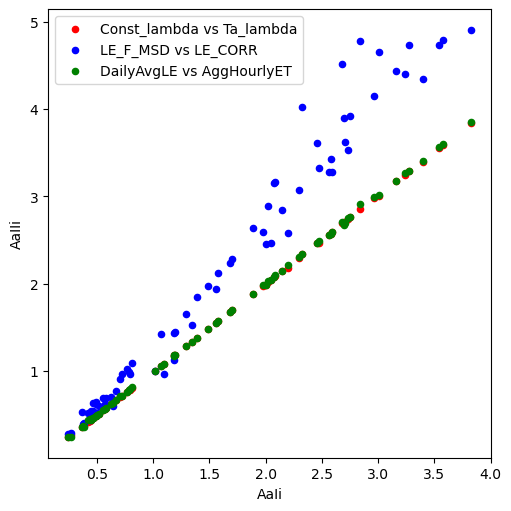

Data/FLUXNET/FLUXNET2022\IT-Cp2.csv


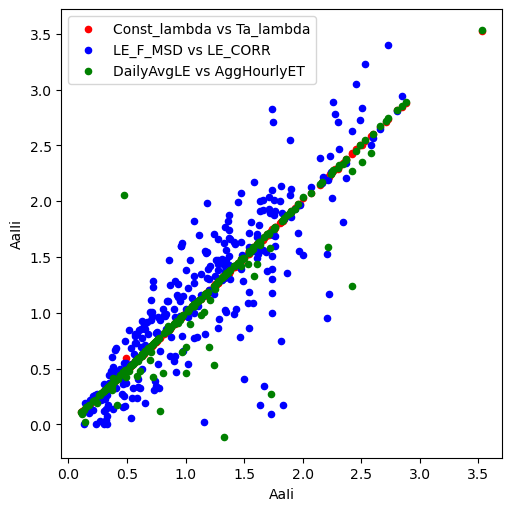

Data/FLUXNET/FLUXNET2022\IT-Lav.csv


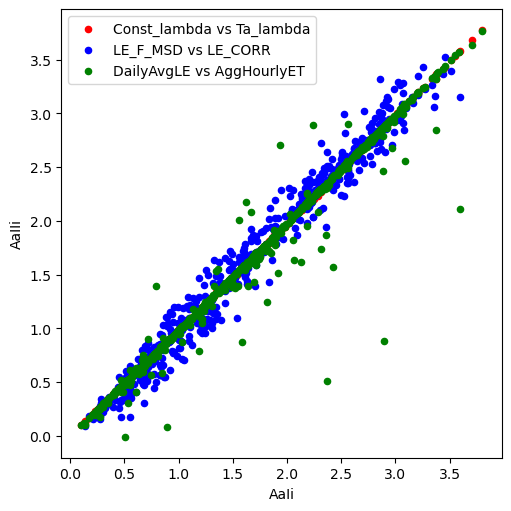

Data/FLUXNET/FLUXNET2022\IT-Lsn.csv


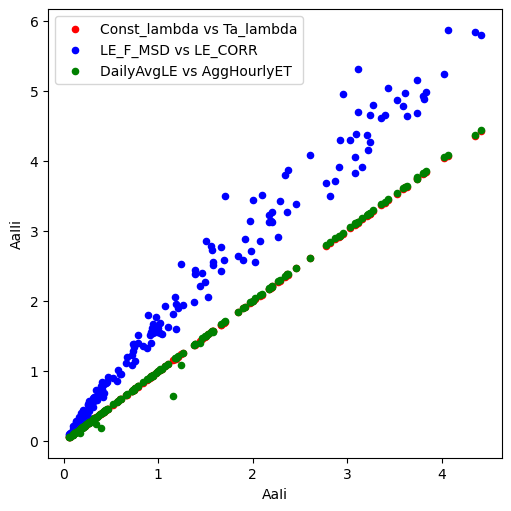

Data/FLUXNET/FLUXNET2022\IT-MBo.csv


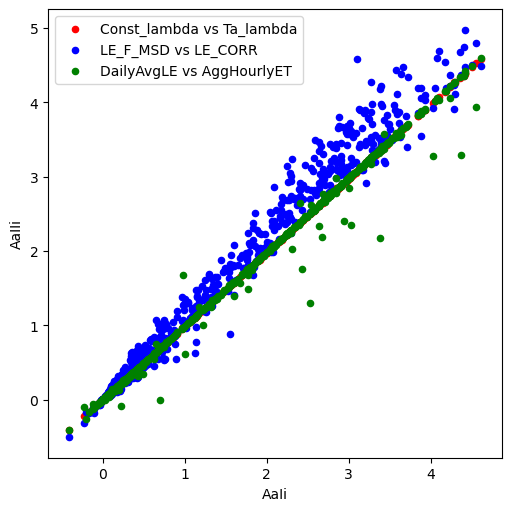

Data/FLUXNET/FLUXNET2022\IT-Ren.csv


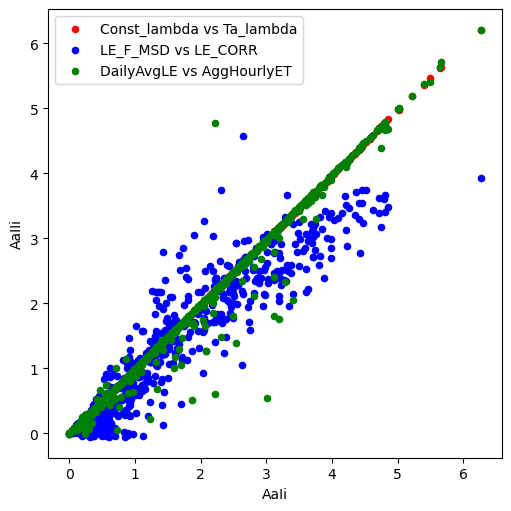

Data/FLUXNET/FLUXNET2022\IT-SR2.csv


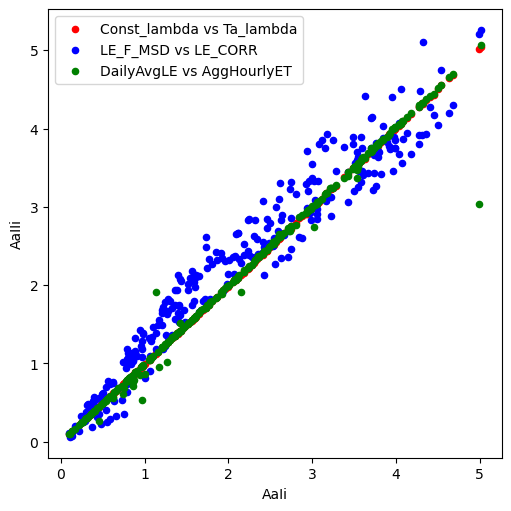

Data/FLUXNET/FLUXNET2022\IT-Tor.csv


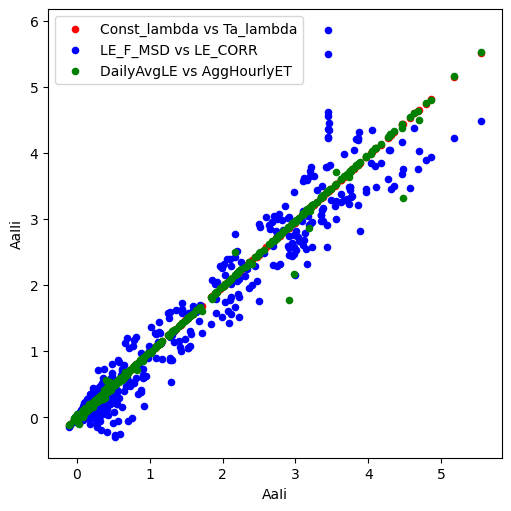

Data/FLUXNET/FLUXNET2022\NL-Loo.csv


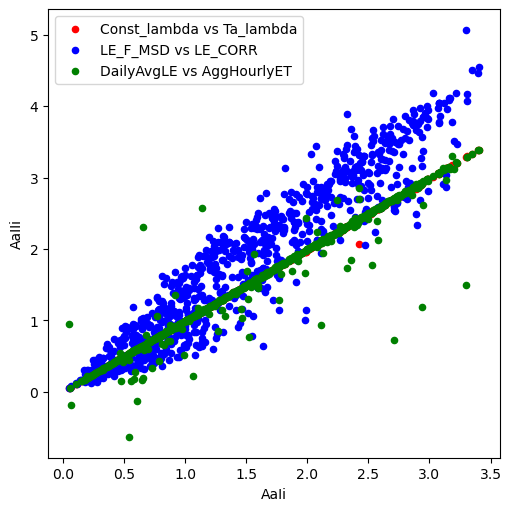

Data/FLUXNET/FLUXNET2022\PE-QFR.csv


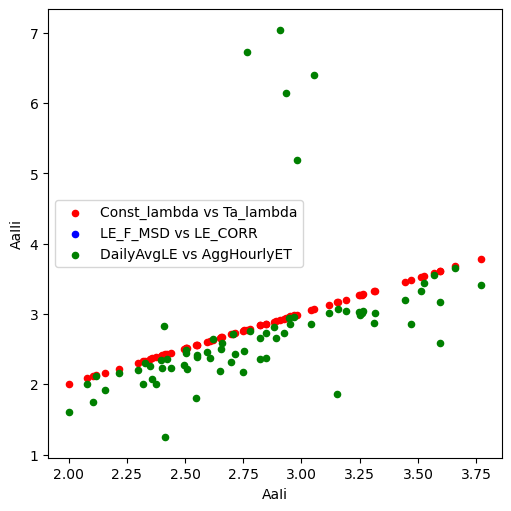

Data/FLUXNET/FLUXNET2022\RU-Fy2.csv


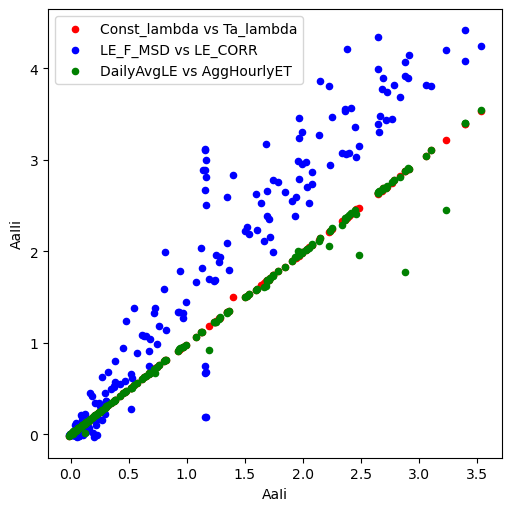

Data/FLUXNET/FLUXNET2022\RU-Fyo.csv


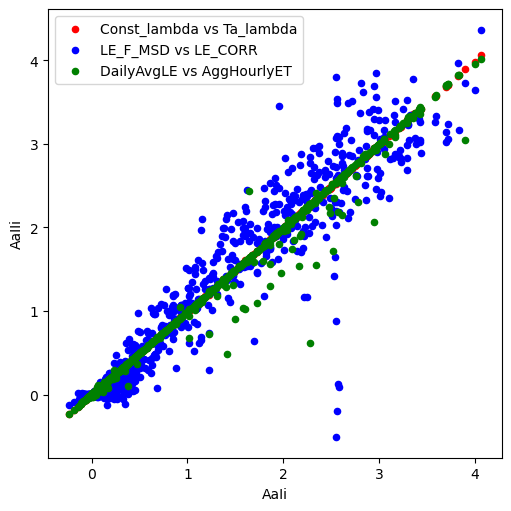

Data/FLUXNET/FLUXNET2022\SE-Deg.csv


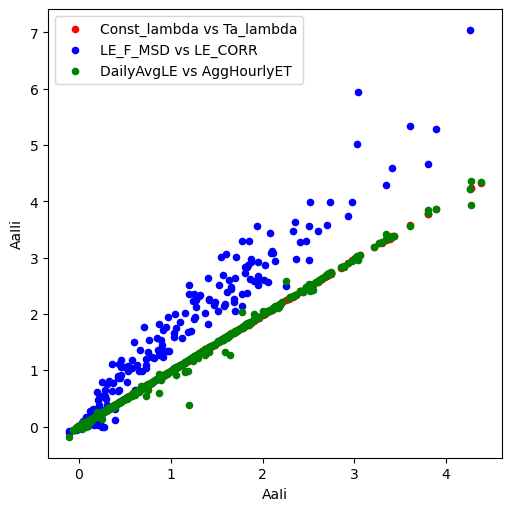

Data/FLUXNET/FLUXNET2022\SE-Htm.csv


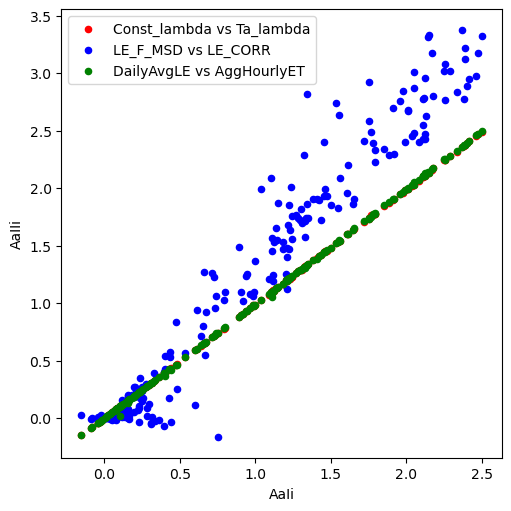

Data/FLUXNET/FLUXNET2022\SE-Lnn.csv


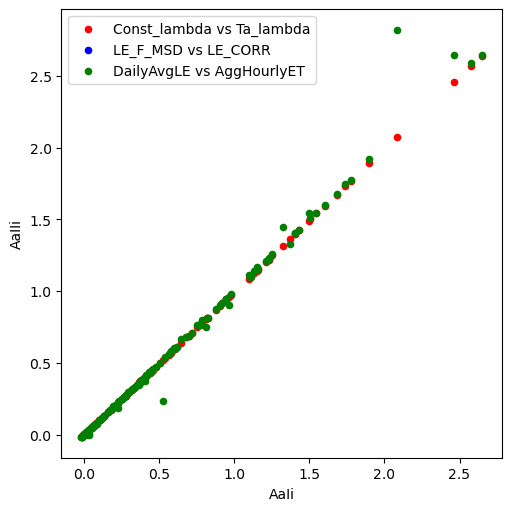

Data/FLUXNET/FLUXNET2022\SE-Nor.csv


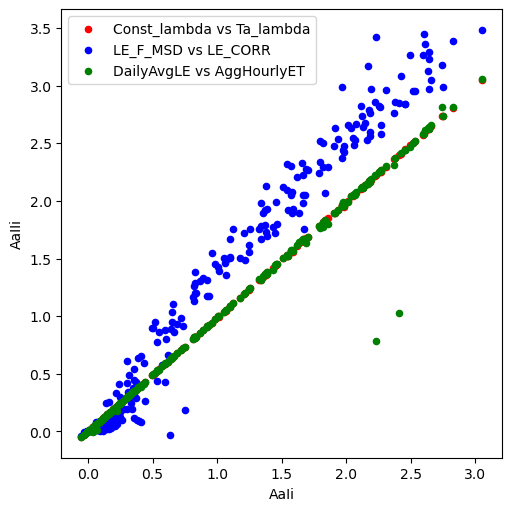

Data/FLUXNET/FLUXNET2022\SE-Ros.csv


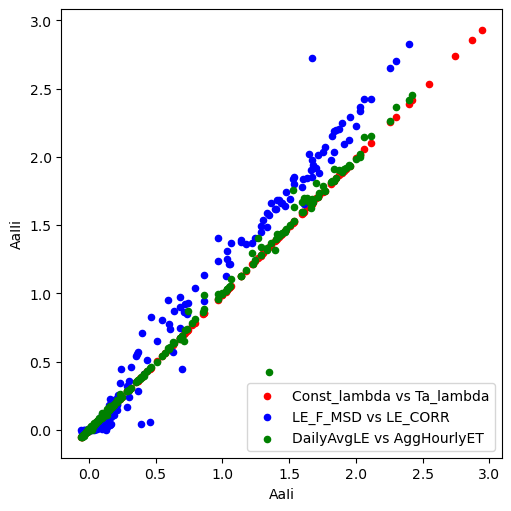

Data/FLUXNET/FLUXNET2022\SE-Svb.csv


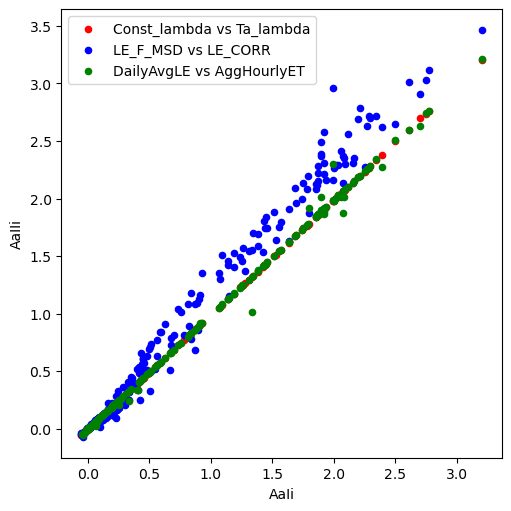

Data/FLUXNET/FLUXNET2022\US-ALQ.csv


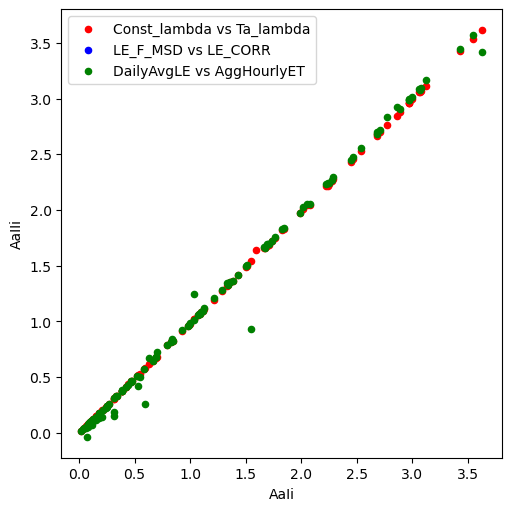

Data/FLUXNET/FLUXNET2022\US-ARM.csv


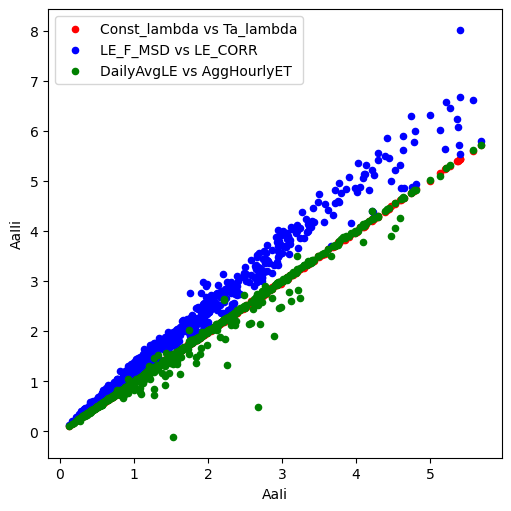

Data/FLUXNET/FLUXNET2022\US-Bar.csv


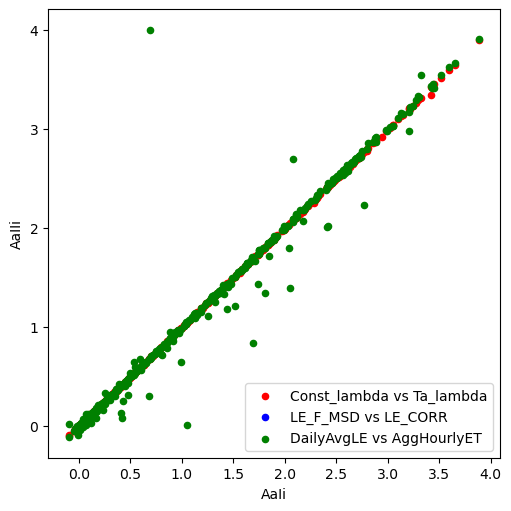

Data/FLUXNET/FLUXNET2022\US-Bi1.csv


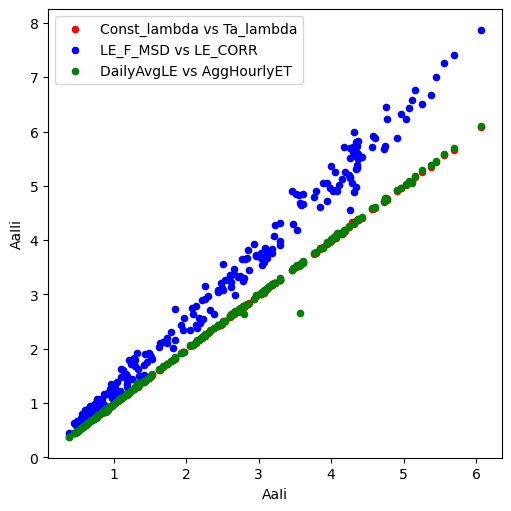

Data/FLUXNET/FLUXNET2022\US-Bi2.csv


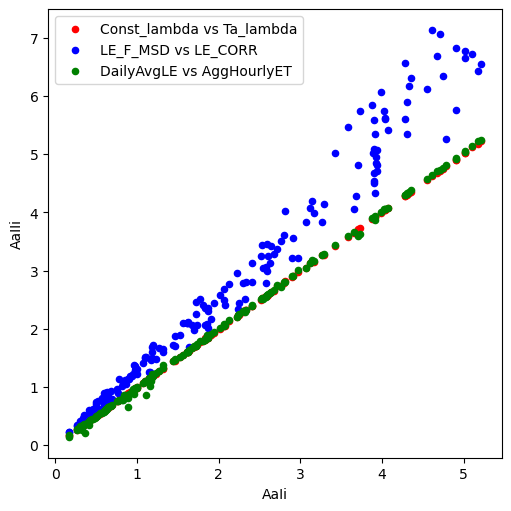

Data/FLUXNET/FLUXNET2022\US-BRG.csv


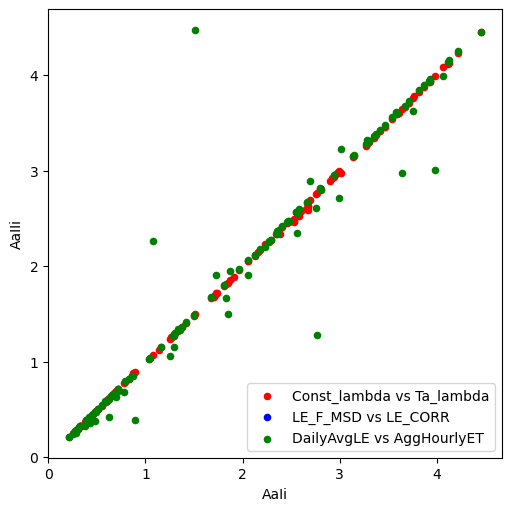

Data/FLUXNET/FLUXNET2022\US-BZB.csv


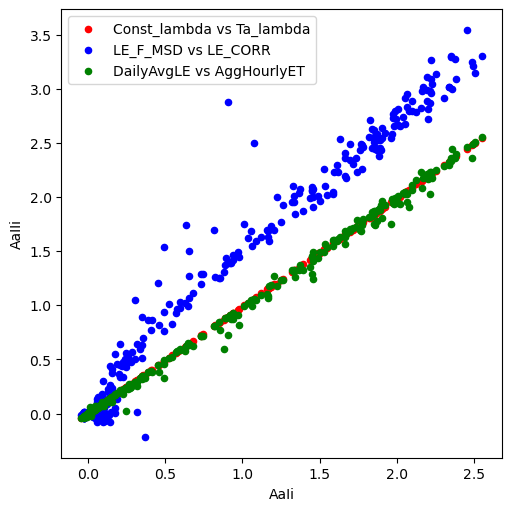

Data/FLUXNET/FLUXNET2022\US-BZF.csv


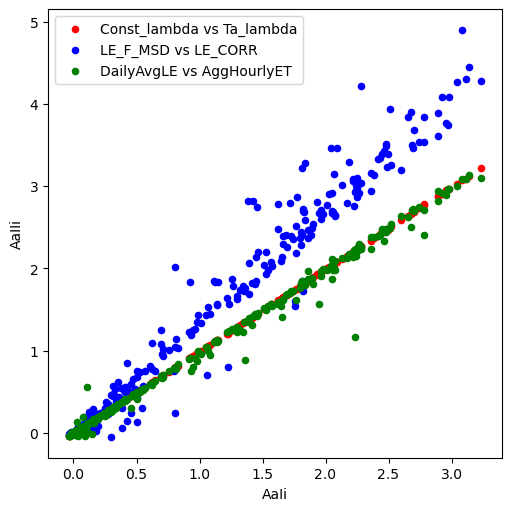

Data/FLUXNET/FLUXNET2022\US-BZo.csv


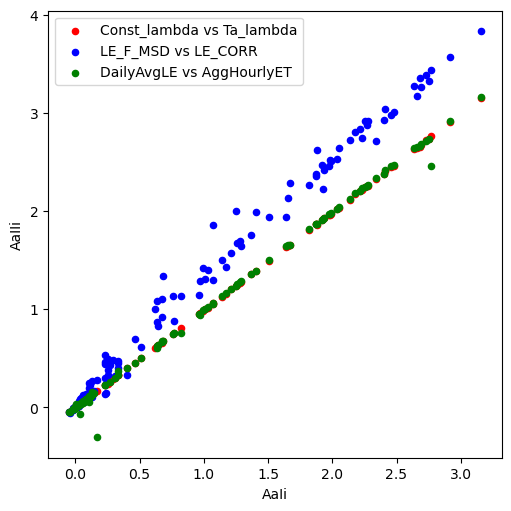

Data/FLUXNET/FLUXNET2022\US-BZS.csv


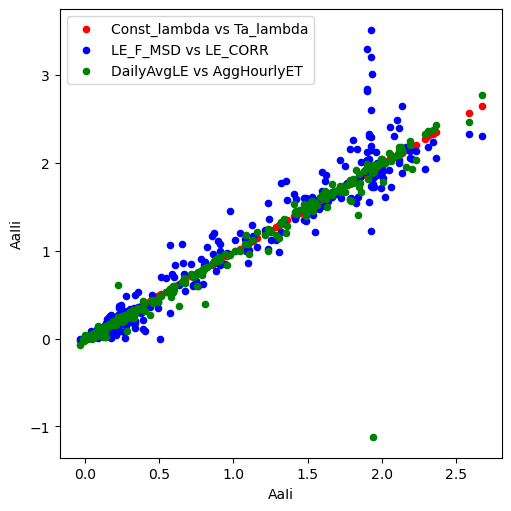

Data/FLUXNET/FLUXNET2022\US-CF1.csv


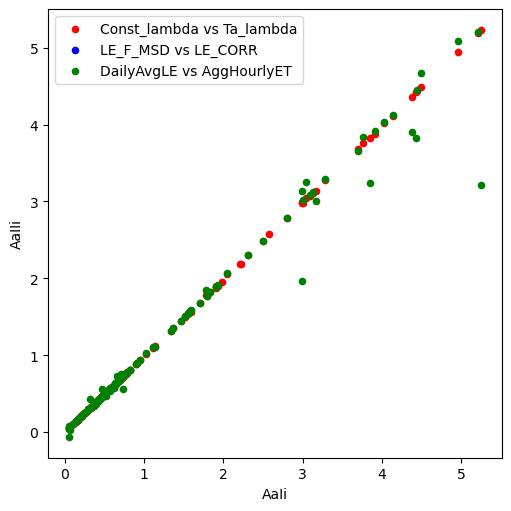

Data/FLUXNET/FLUXNET2022\US-CF2.csv


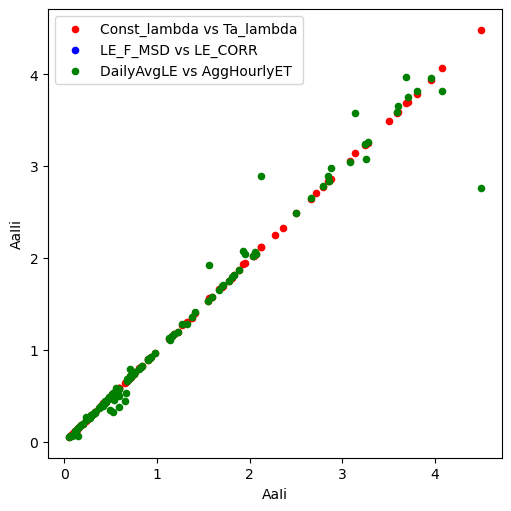

Data/FLUXNET/FLUXNET2022\US-CF3.csv


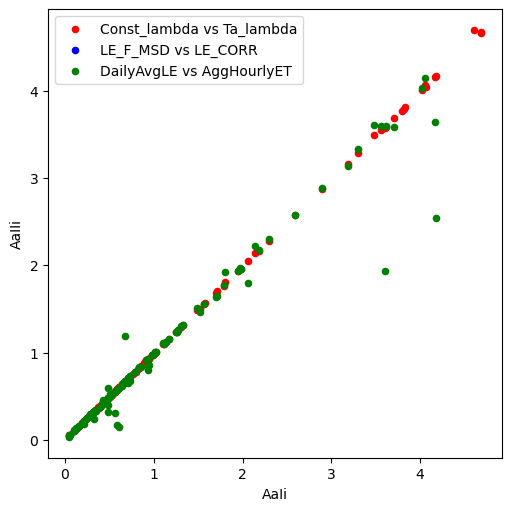

Data/FLUXNET/FLUXNET2022\US-CF4.csv


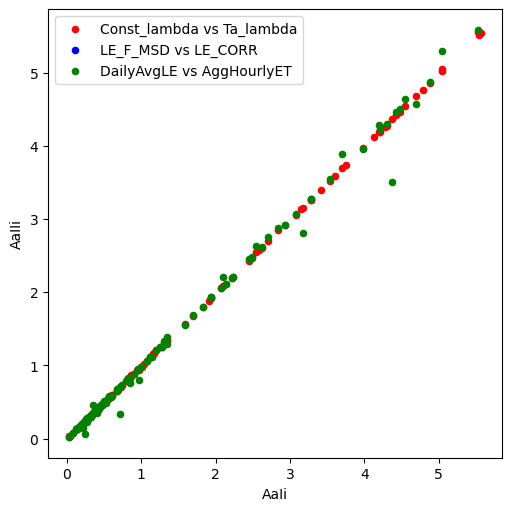

Data/FLUXNET/FLUXNET2022\US-CS1.csv


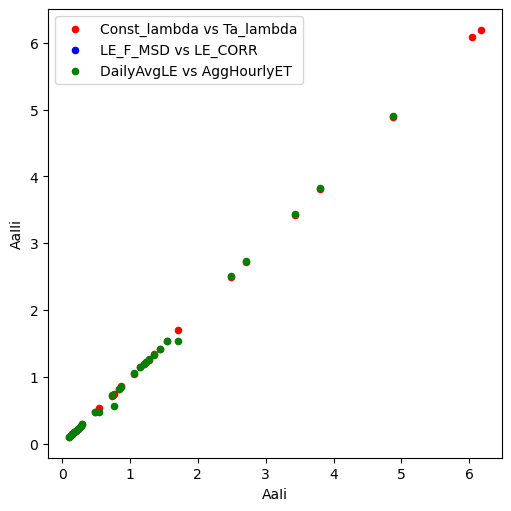

Data/FLUXNET/FLUXNET2022\US-CS2.csv


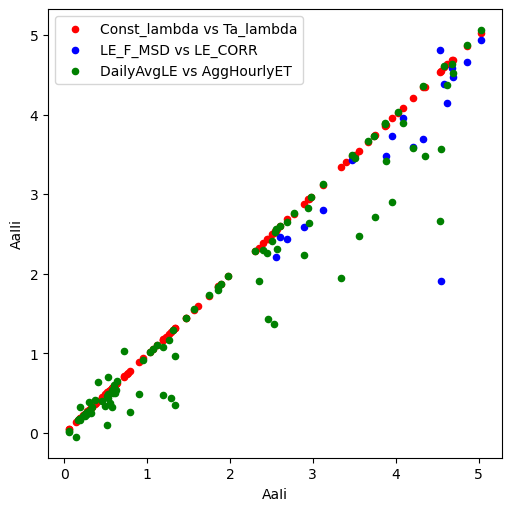

Data/FLUXNET/FLUXNET2022\US-CS3.csv


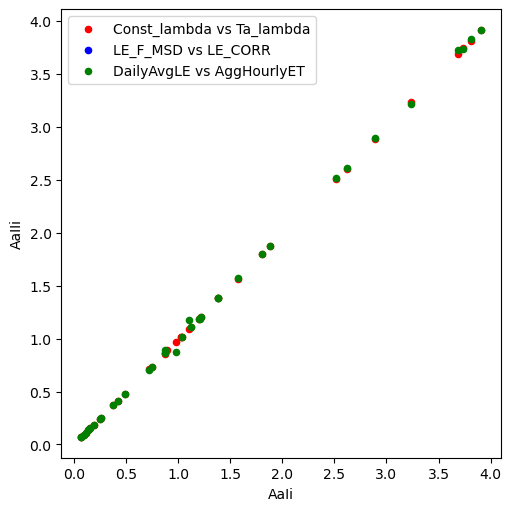

Data/FLUXNET/FLUXNET2022\US-CS4.csv


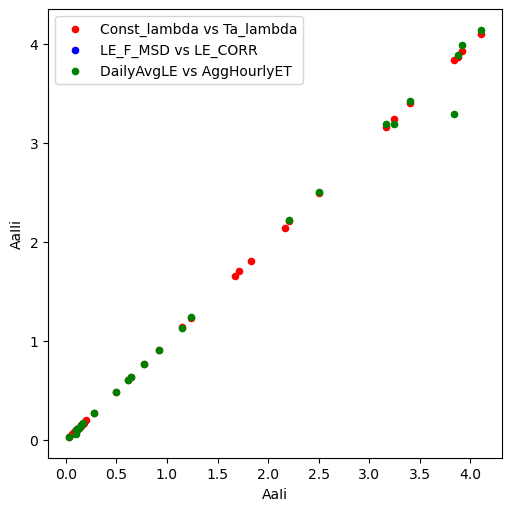

Data/FLUXNET/FLUXNET2022\US-DFC.csv


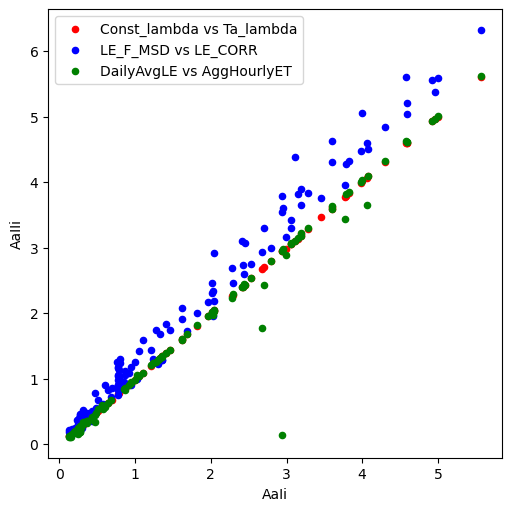

Data/FLUXNET/FLUXNET2022\US-DS3.csv


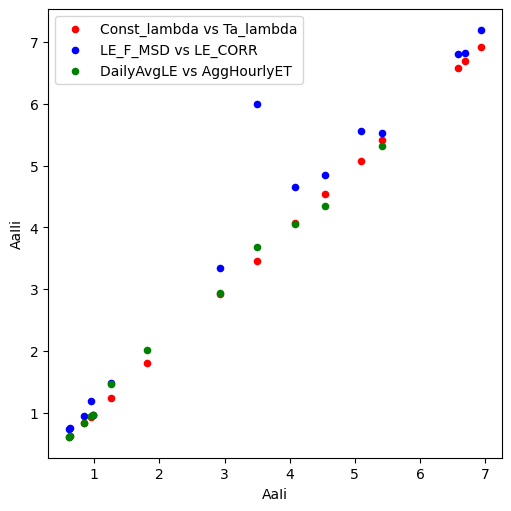

Data/FLUXNET/FLUXNET2022\US-EDN.csv


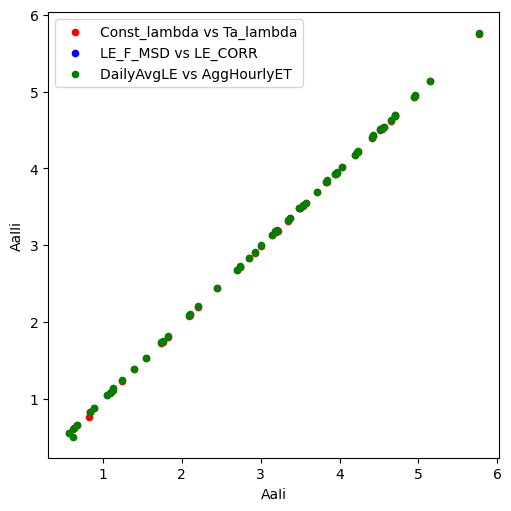

Data/FLUXNET/FLUXNET2022\US-EML.csv


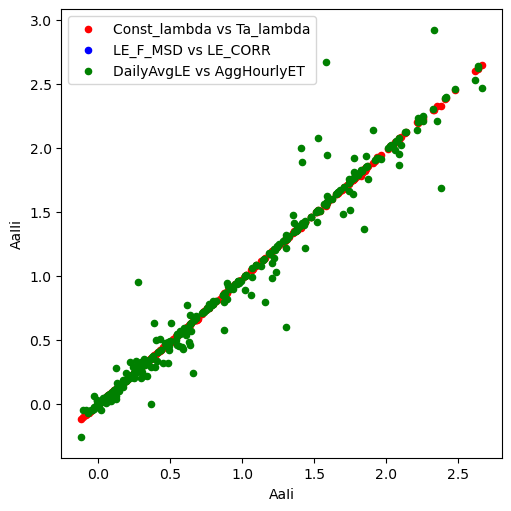

Data/FLUXNET/FLUXNET2022\US-GLE.csv


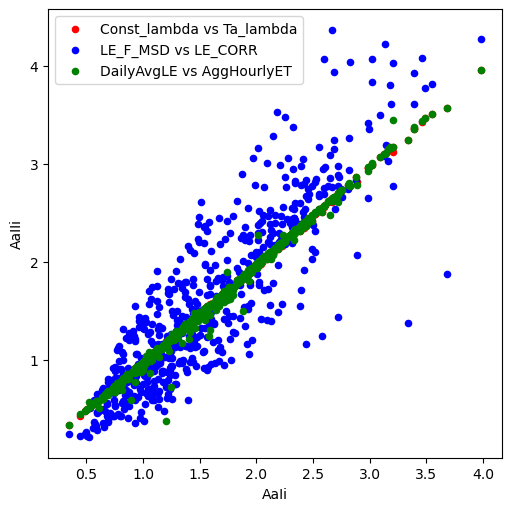

Data/FLUXNET/FLUXNET2022\US-HB1.csv


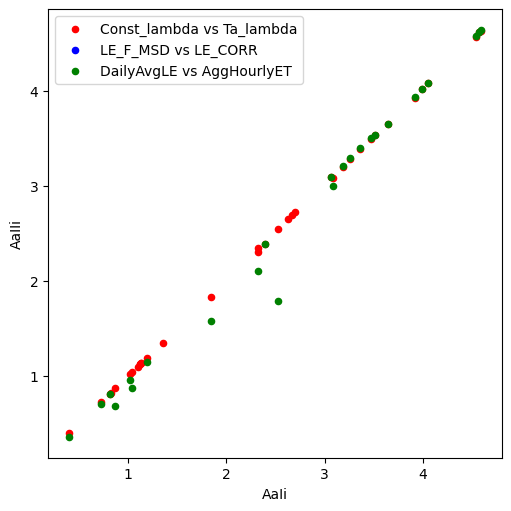

Data/FLUXNET/FLUXNET2022\US-HB2.csv


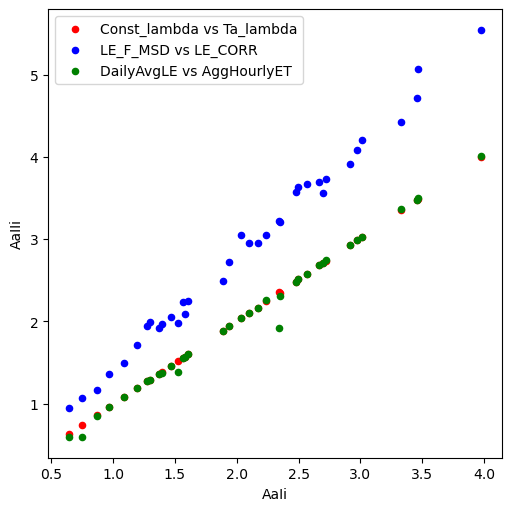

Data/FLUXNET/FLUXNET2022\US-HB3.csv


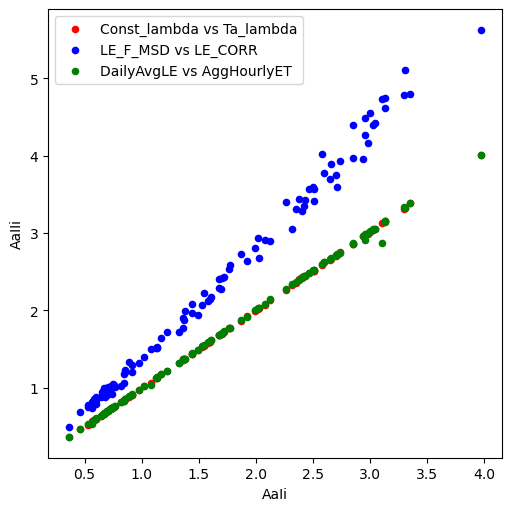

Data/FLUXNET/FLUXNET2022\US-Hn2.csv


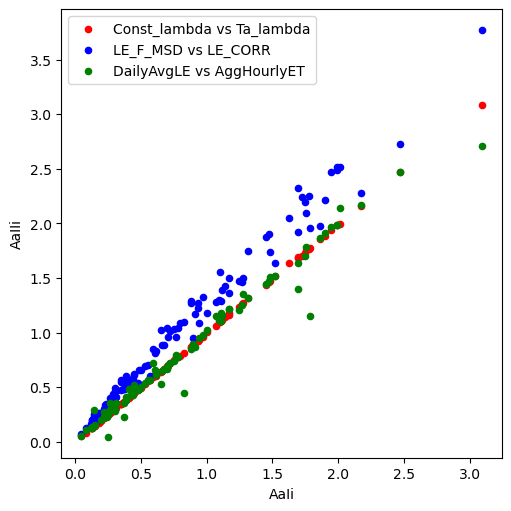

Data/FLUXNET/FLUXNET2022\US-Hn3.csv


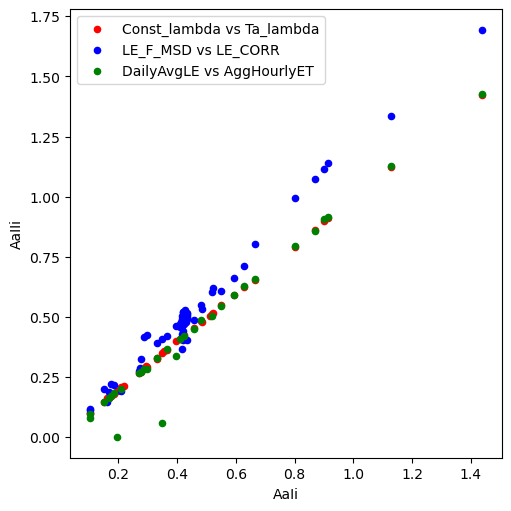

Data/FLUXNET/FLUXNET2022\US-Ho2.csv


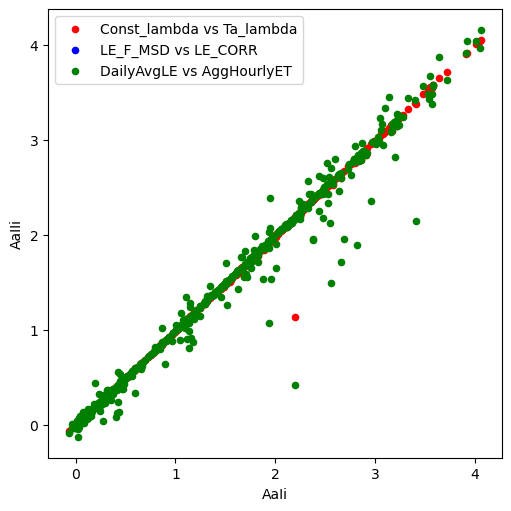

Data/FLUXNET/FLUXNET2022\US-HWB.csv


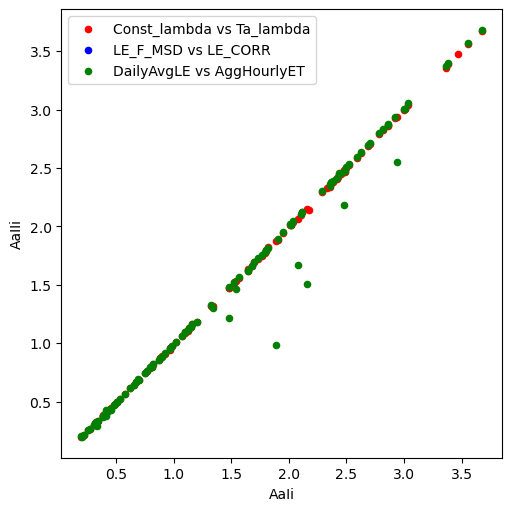

Data/FLUXNET/FLUXNET2022\US-ICh.csv


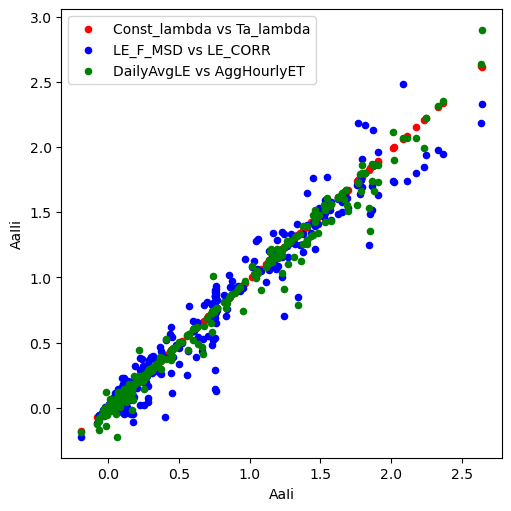

Data/FLUXNET/FLUXNET2022\US-ICs.csv


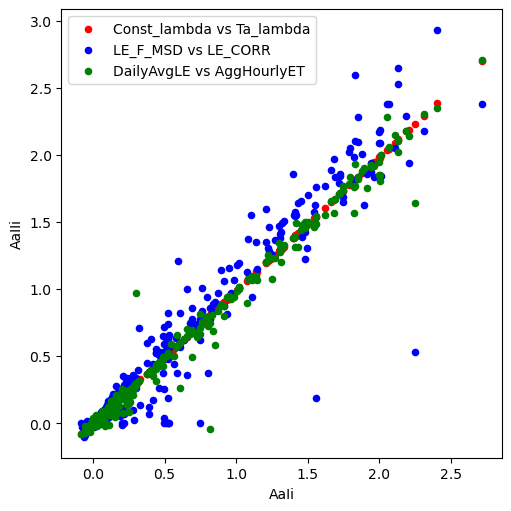

Data/FLUXNET/FLUXNET2022\US-ICt.csv


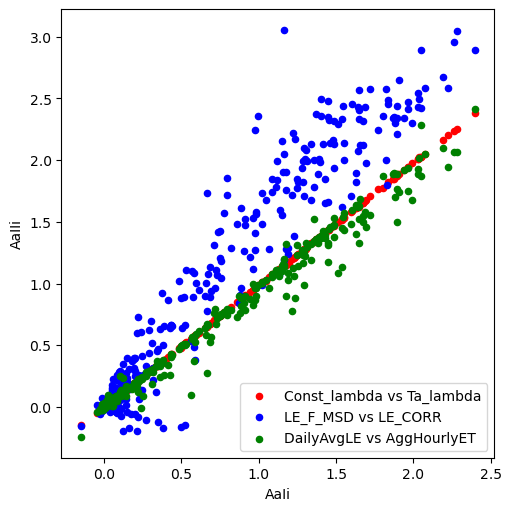

Data/FLUXNET/FLUXNET2022\US-Jo1.csv


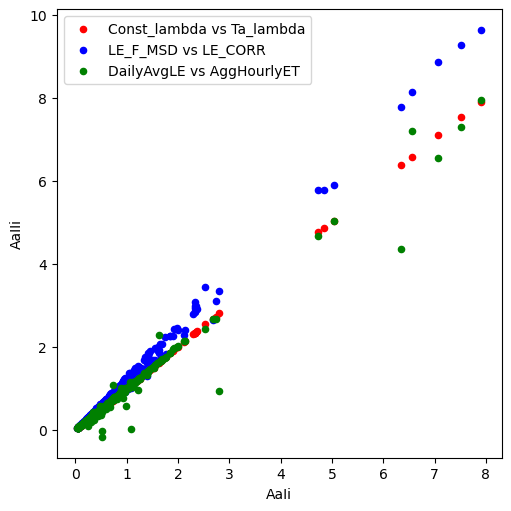

Data/FLUXNET/FLUXNET2022\US-Jo2.csv


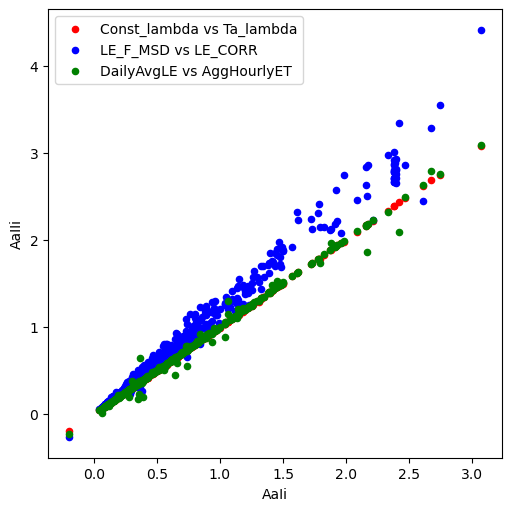

Data/FLUXNET/FLUXNET2022\US-KFS.csv


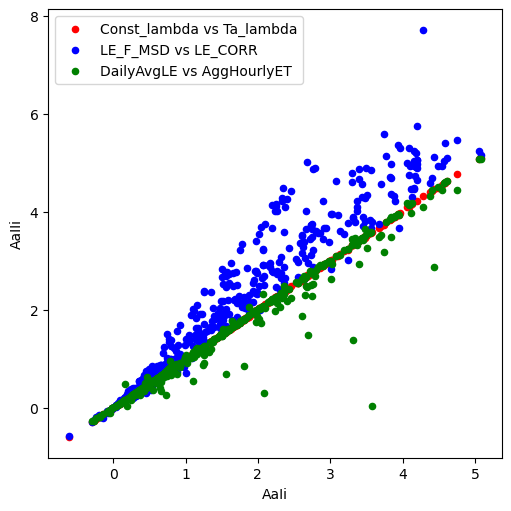

Data/FLUXNET/FLUXNET2022\US-KLS.csv


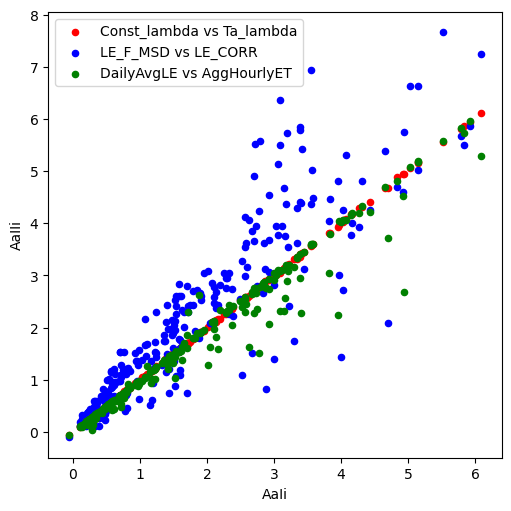

Data/FLUXNET/FLUXNET2022\US-Kon.csv


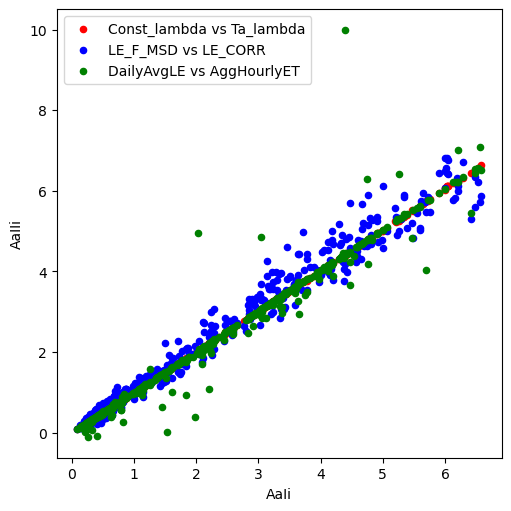

Data/FLUXNET/FLUXNET2022\US-KS3.csv


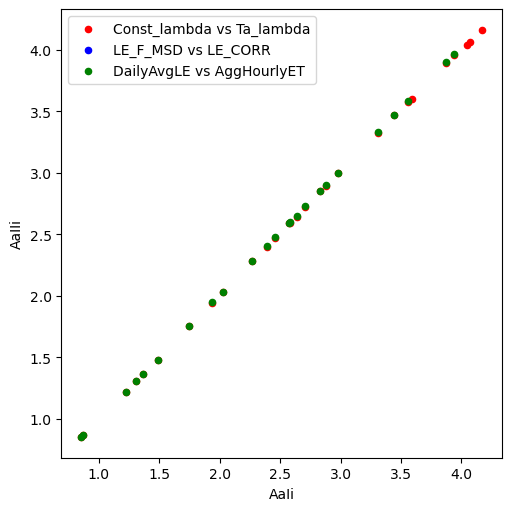

Data/FLUXNET/FLUXNET2022\US-Me2.csv


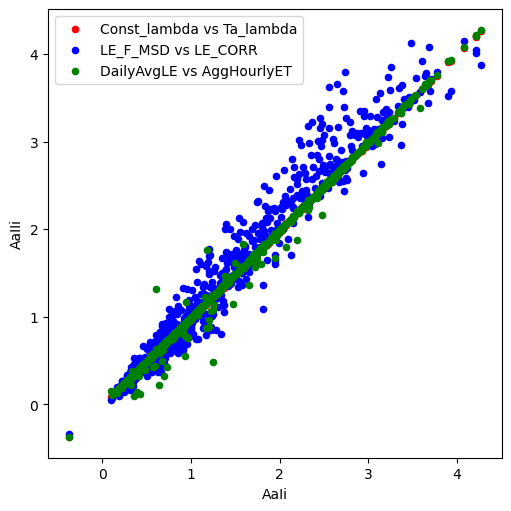

Data/FLUXNET/FLUXNET2022\US-Me6.csv


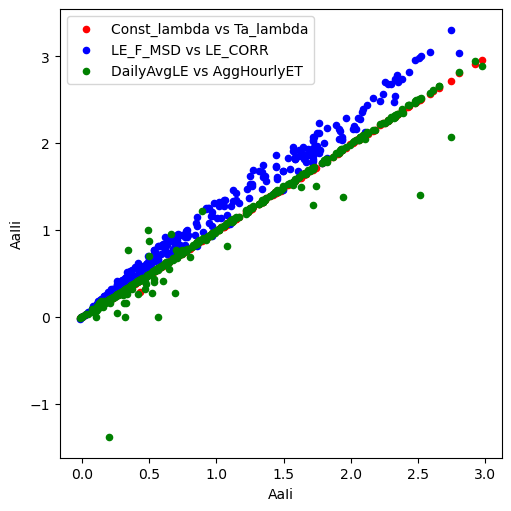

Data/FLUXNET/FLUXNET2022\US-Mo1.csv


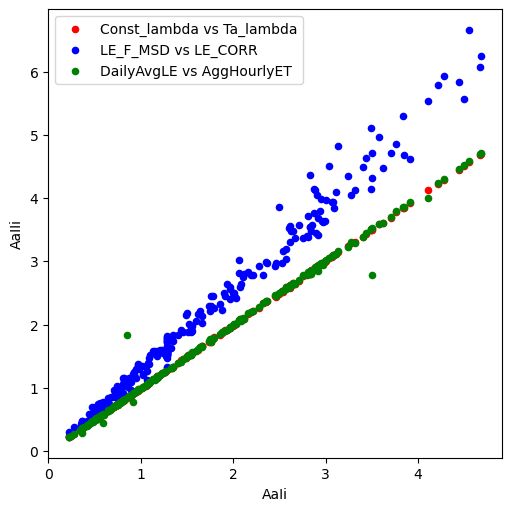

Data/FLUXNET/FLUXNET2022\US-Mo2.csv


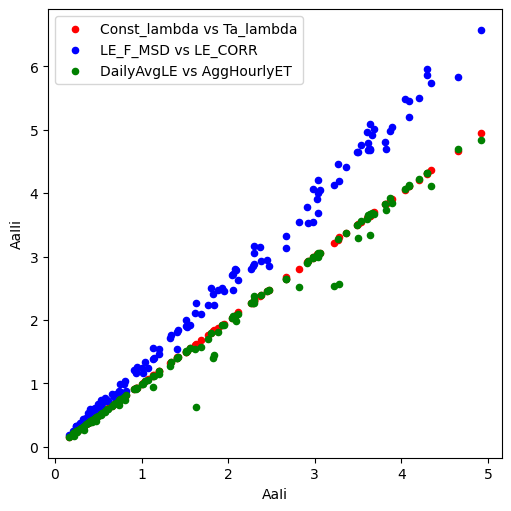

Data/FLUXNET/FLUXNET2022\US-Mo3.csv


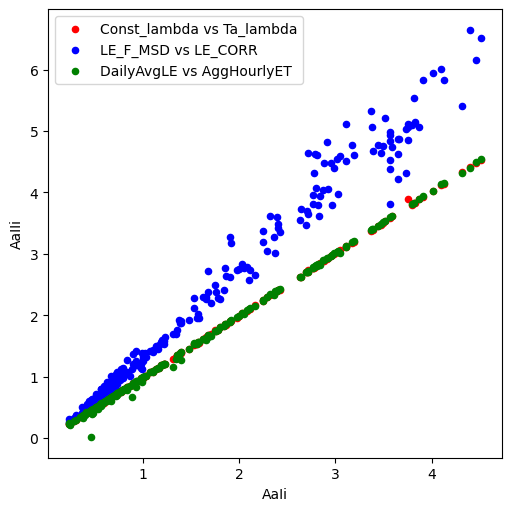

Data/FLUXNET/FLUXNET2022\US-MOz.csv


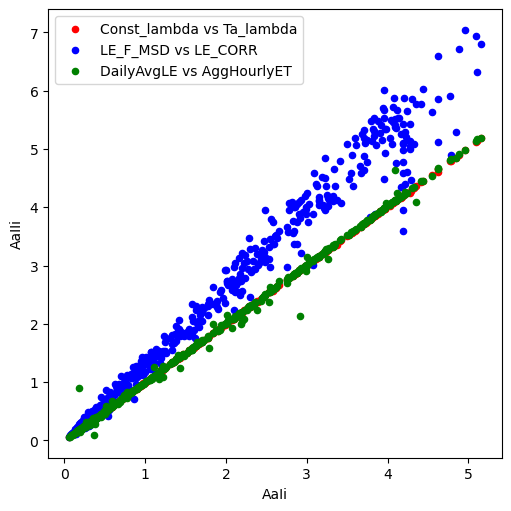

Data/FLUXNET/FLUXNET2022\US-Mpj.csv


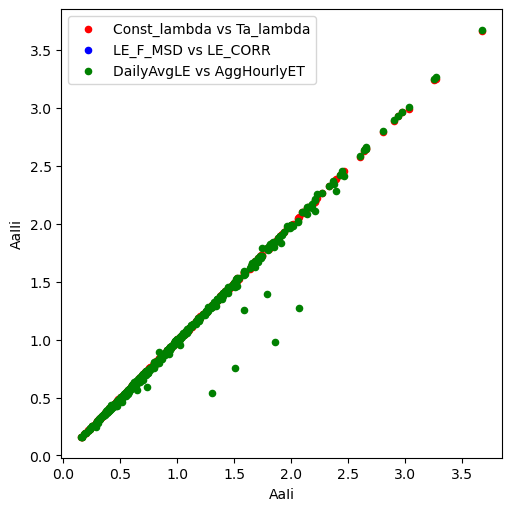

Data/FLUXNET/FLUXNET2022\US-NC3.csv


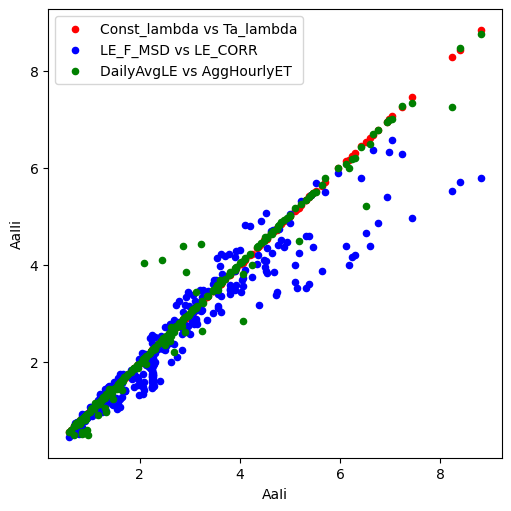

Data/FLUXNET/FLUXNET2022\US-NC4.csv


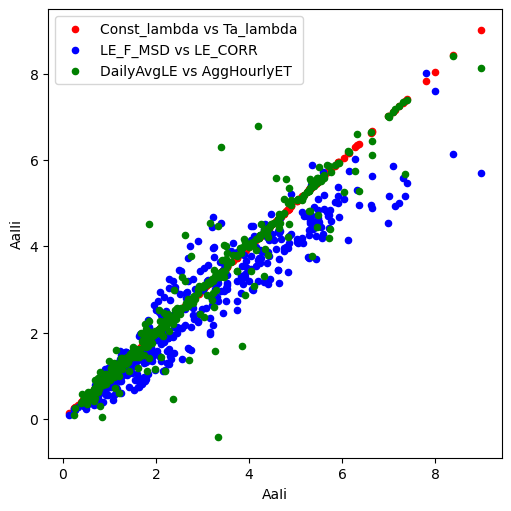

Data/FLUXNET/FLUXNET2022\US-NGB.csv


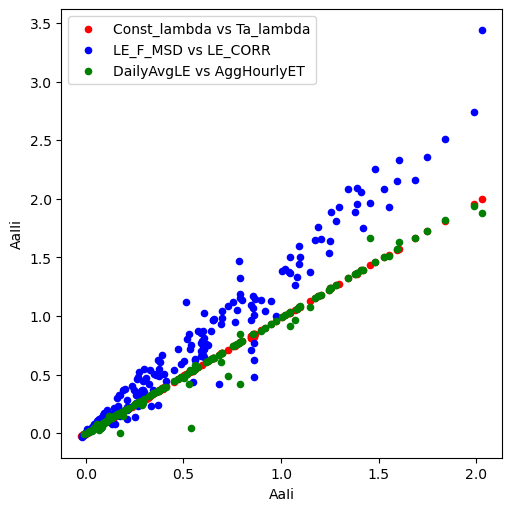

Data/FLUXNET/FLUXNET2022\US-NGC.csv


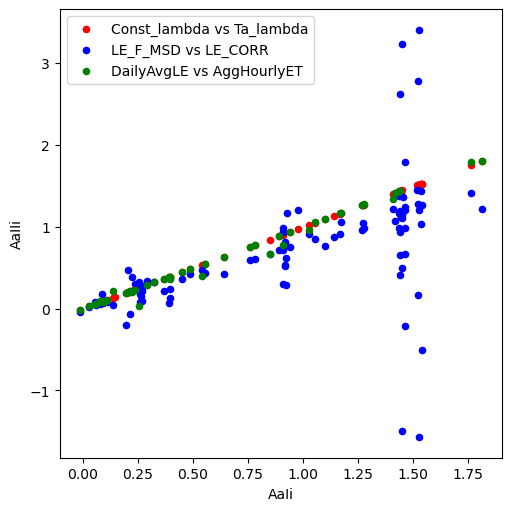

Data/FLUXNET/FLUXNET2022\US-ONA.csv


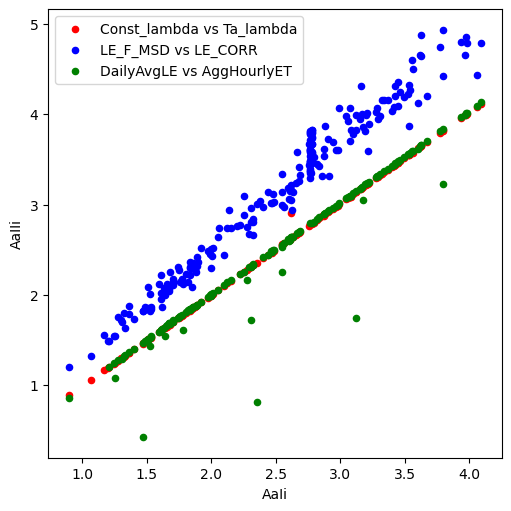

Data/FLUXNET/FLUXNET2022\US-Pnp.csv


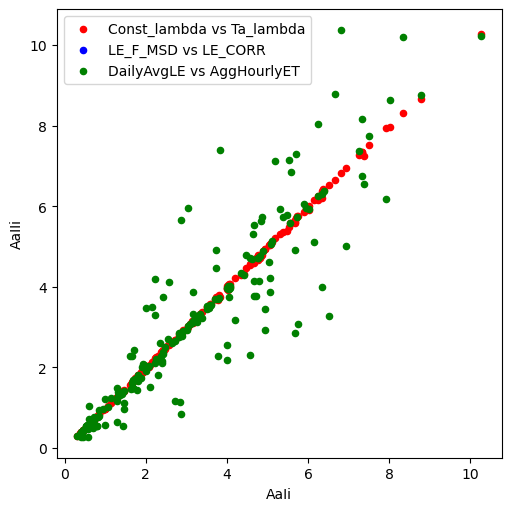

Data/FLUXNET/FLUXNET2022\US-RGA.csv


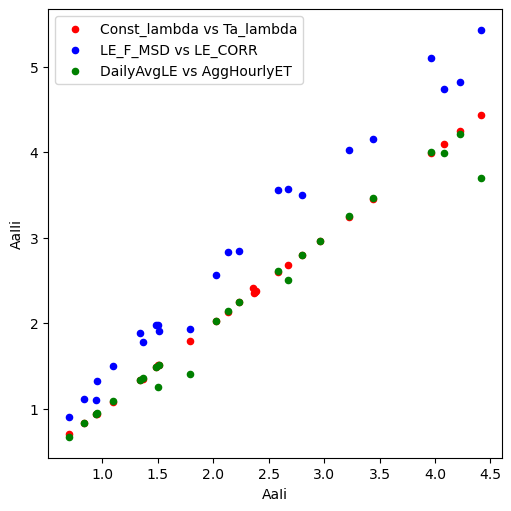

Data/FLUXNET/FLUXNET2022\US-RGB.csv


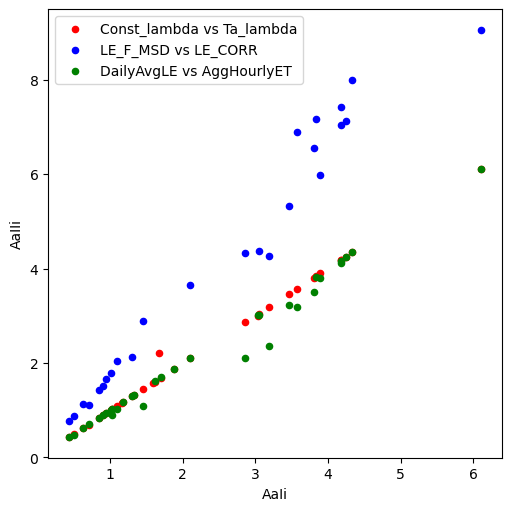

Data/FLUXNET/FLUXNET2022\US-RGo.csv


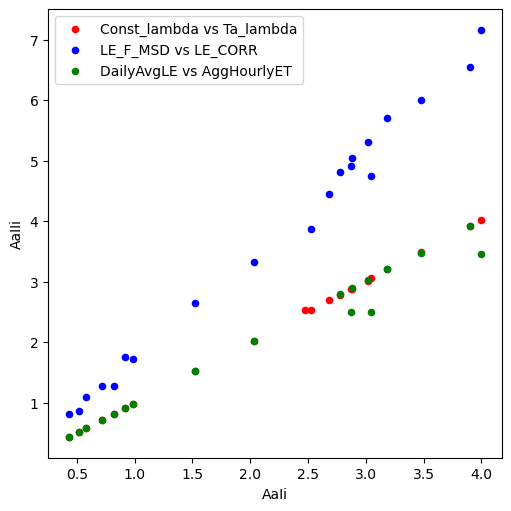

Data/FLUXNET/FLUXNET2022\US-Rls.csv


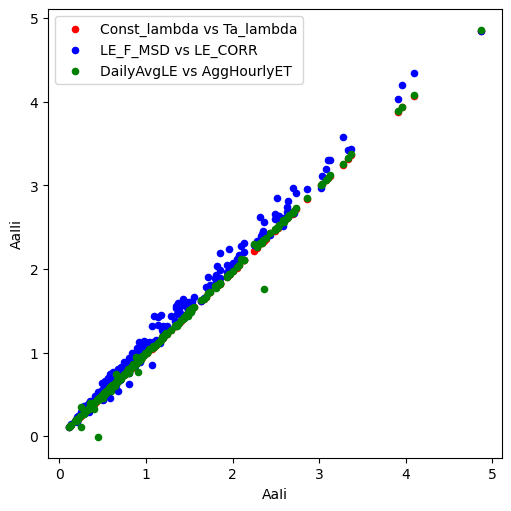

Data/FLUXNET/FLUXNET2022\US-Rms.csv


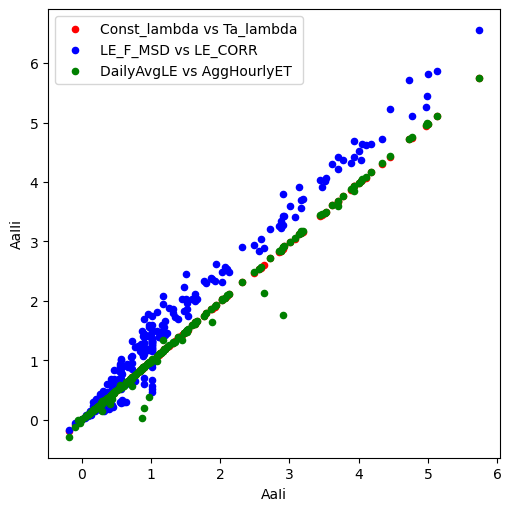

Data/FLUXNET/FLUXNET2022\US-Ro4.csv


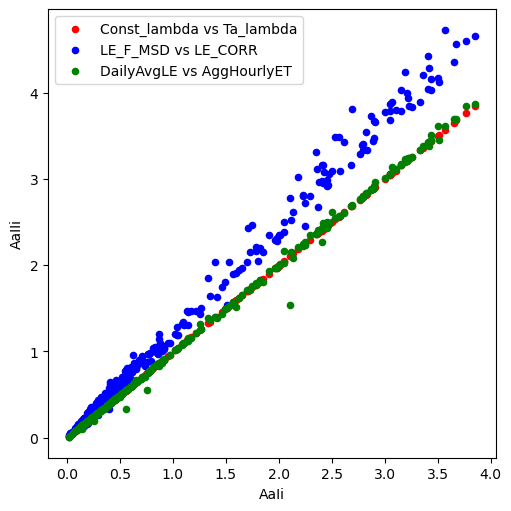

Data/FLUXNET/FLUXNET2022\US-Ro5.csv


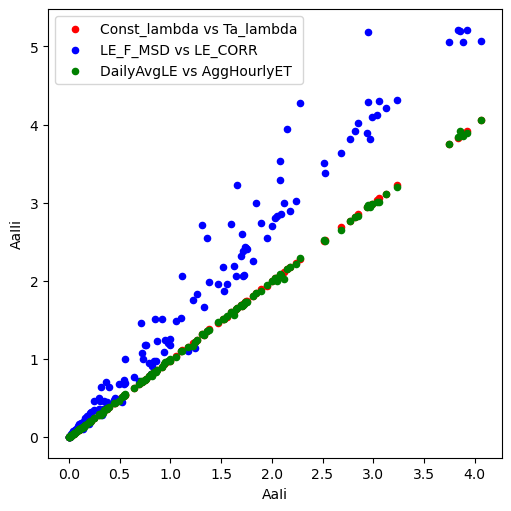

Data/FLUXNET/FLUXNET2022\US-Ro6.csv


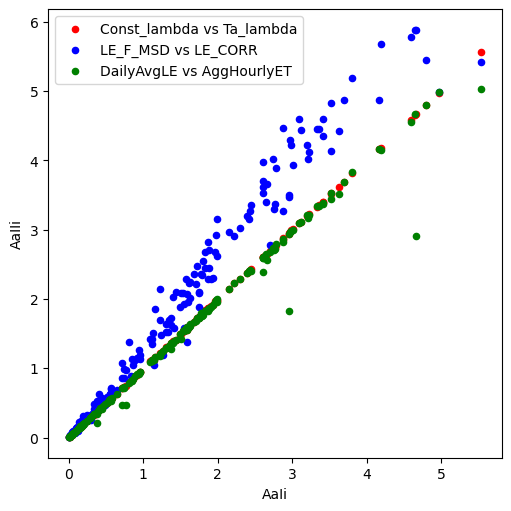

Data/FLUXNET/FLUXNET2022\US-Rpf.csv


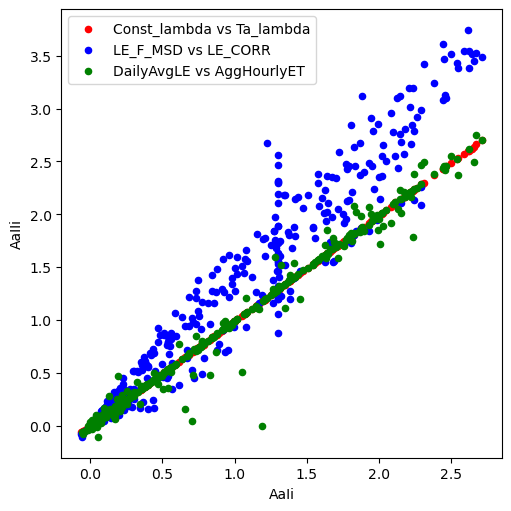

Data/FLUXNET/FLUXNET2022\US-Rwf.csv


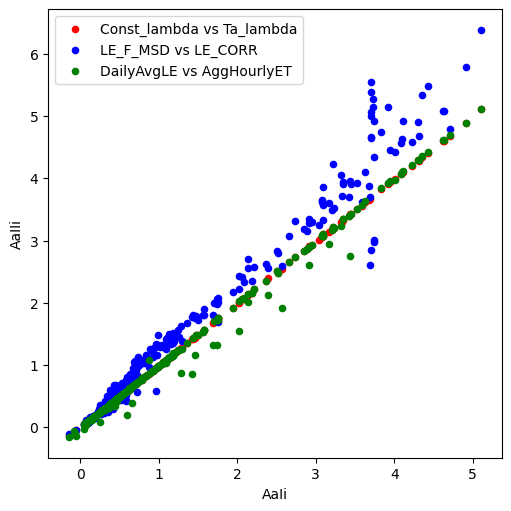

Data/FLUXNET/FLUXNET2022\US-Rws.csv


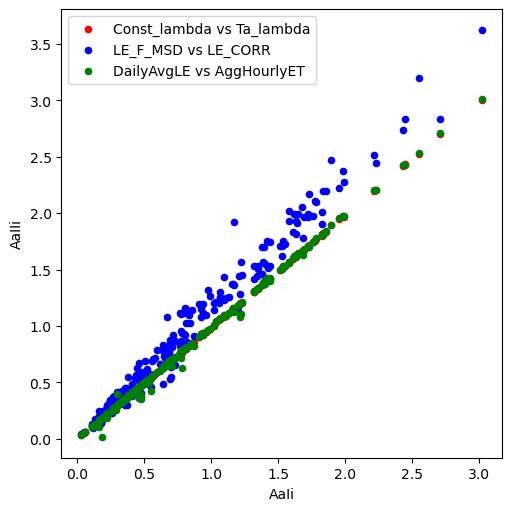

Data/FLUXNET/FLUXNET2022\US-Seg.csv


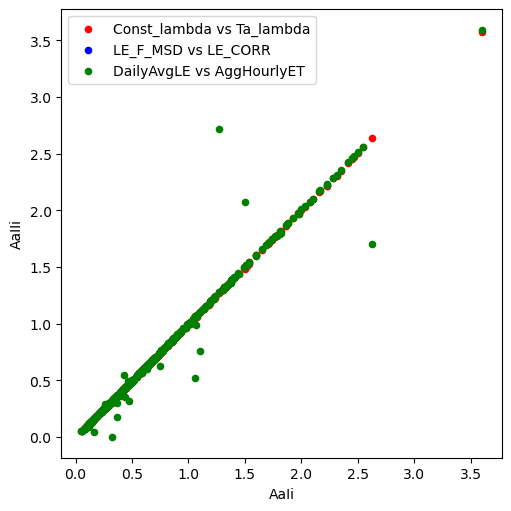

Data/FLUXNET/FLUXNET2022\US-Ses.csv


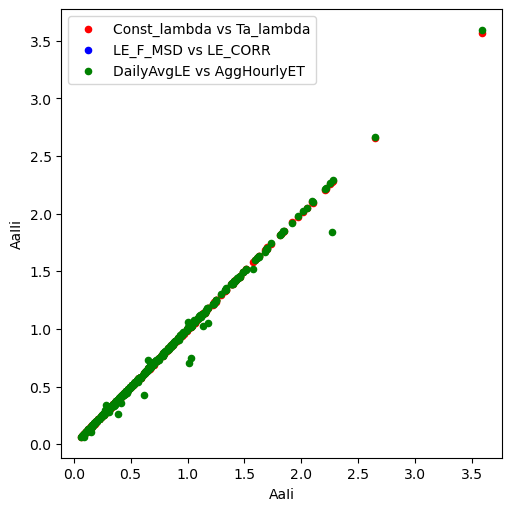

Data/FLUXNET/FLUXNET2022\US-Sne.csv


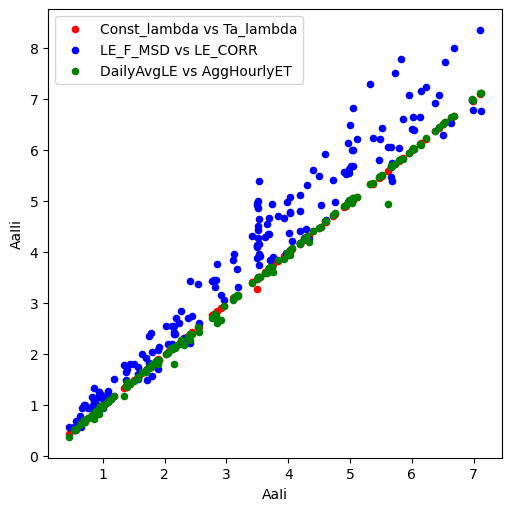

Data/FLUXNET/FLUXNET2022\US-Snf.csv


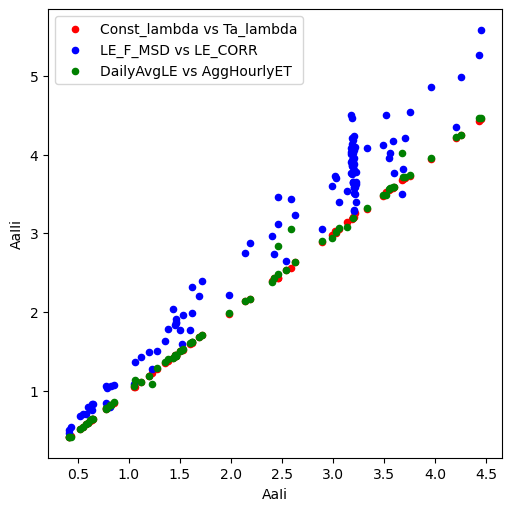

Data/FLUXNET/FLUXNET2022\US-SRG.csv


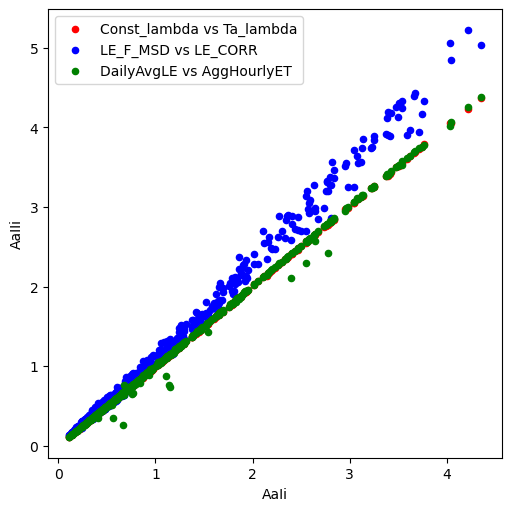

Data/FLUXNET/FLUXNET2022\US-SRS.csv


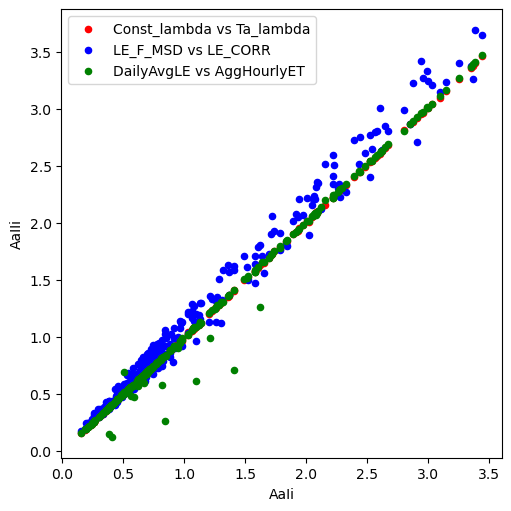

Data/FLUXNET/FLUXNET2022\US-Syv.csv


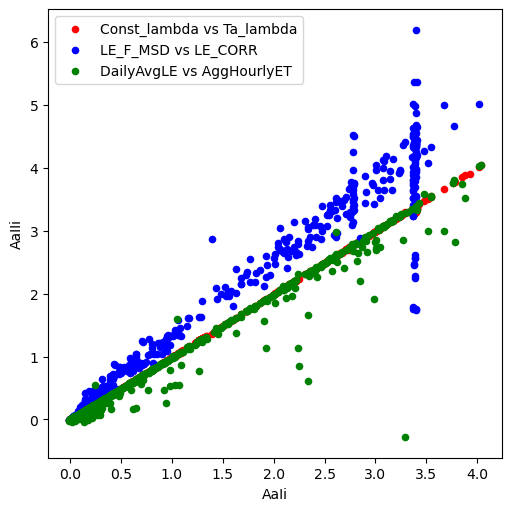

Data/FLUXNET/FLUXNET2022\US-Ton.csv


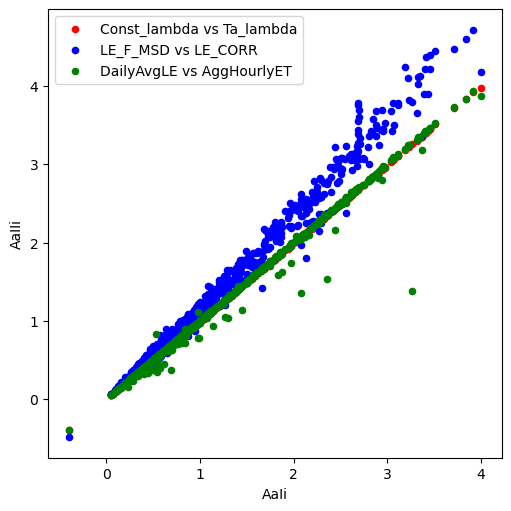

Data/FLUXNET/FLUXNET2022\US-Tw1.csv


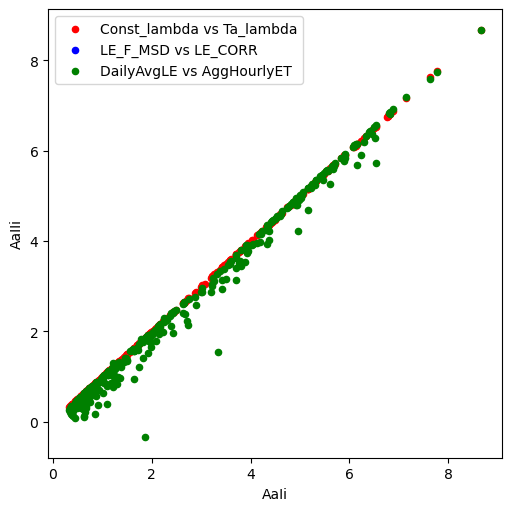

Data/FLUXNET/FLUXNET2022\US-Tw3.csv


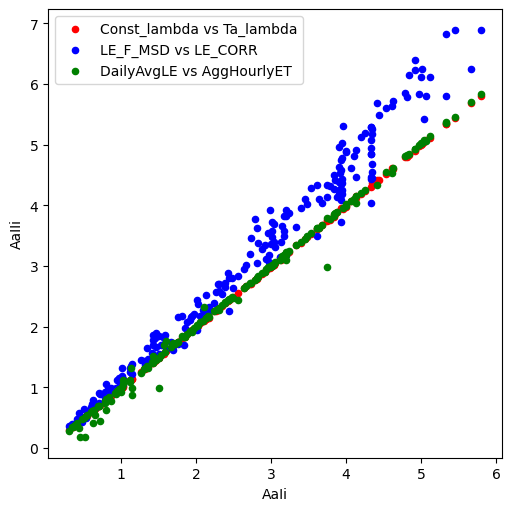

Data/FLUXNET/FLUXNET2022\US-Tw4.csv


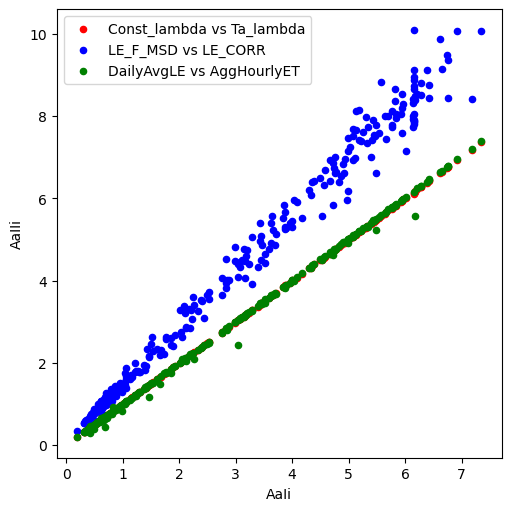

Data/FLUXNET/FLUXNET2022\US-Tw5.csv


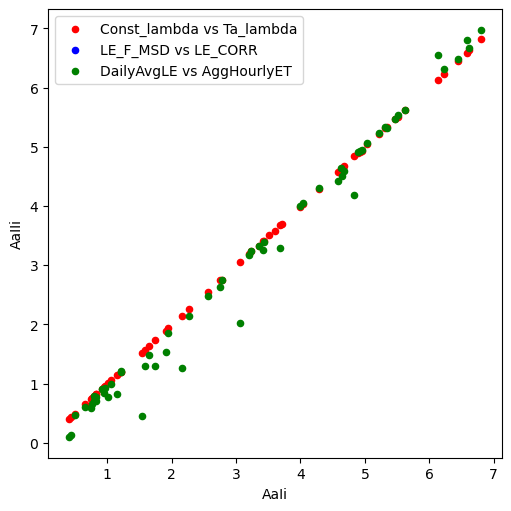

Data/FLUXNET/FLUXNET2022\US-UMB.csv


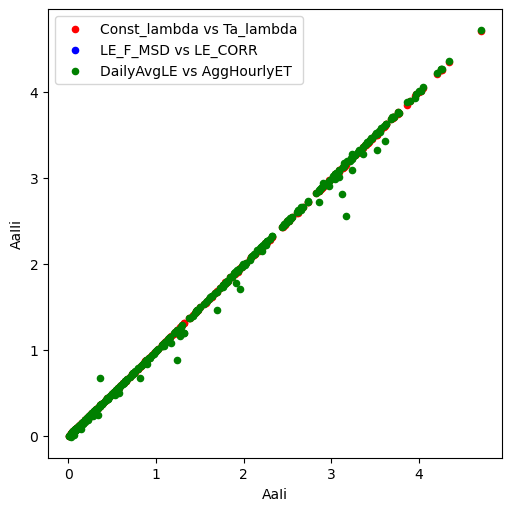

Data/FLUXNET/FLUXNET2022\US-UMd.csv


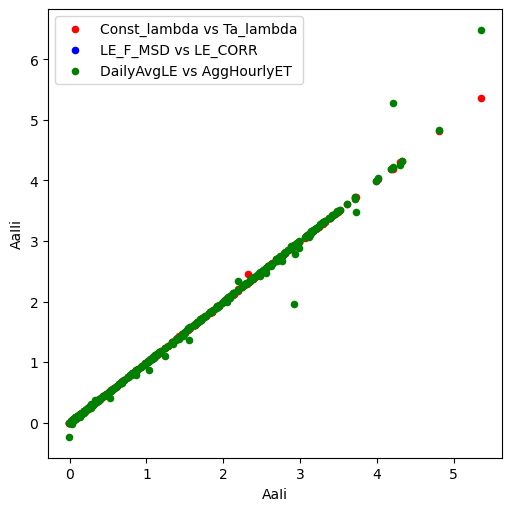

Data/FLUXNET/FLUXNET2022\US-Var.csv


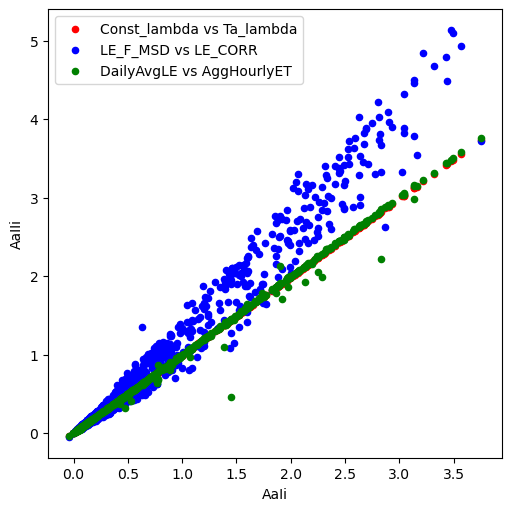

Data/FLUXNET/FLUXNET2022\US-Vcm.csv


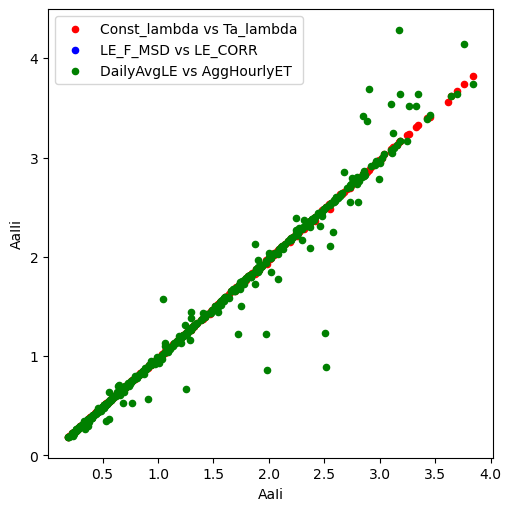

Data/FLUXNET/FLUXNET2022\US-Vcp.csv


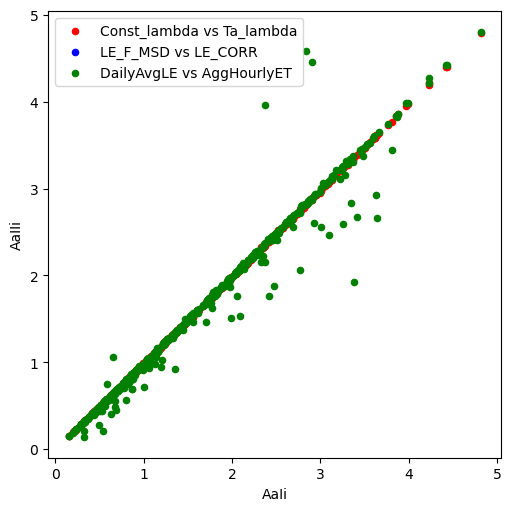

Data/FLUXNET/FLUXNET2022\US-Whs.csv


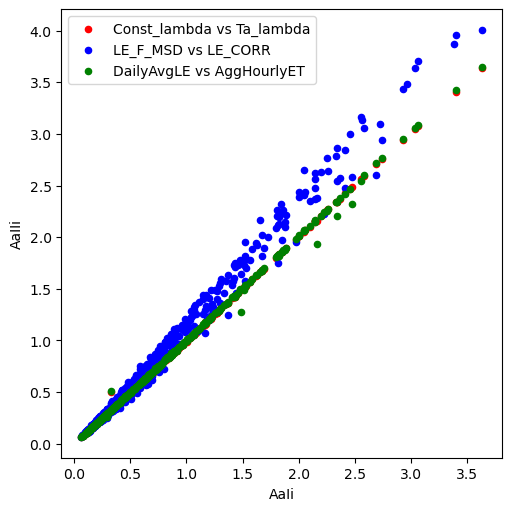

Data/FLUXNET/FLUXNET2022\US-Wi0.csv


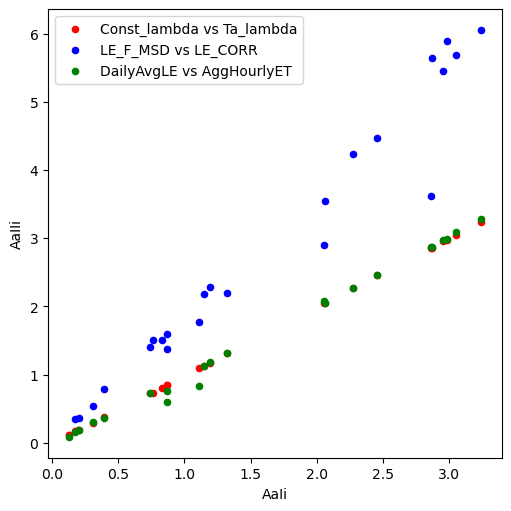

Data/FLUXNET/FLUXNET2022\US-Wkg.csv


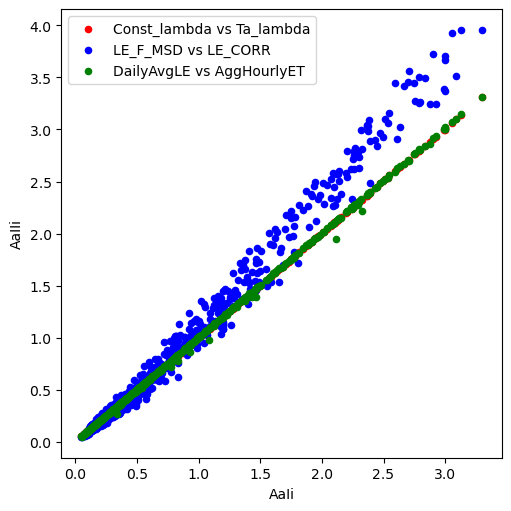

Data/FLUXNET/FLUXNET2022\US-xAB.csv


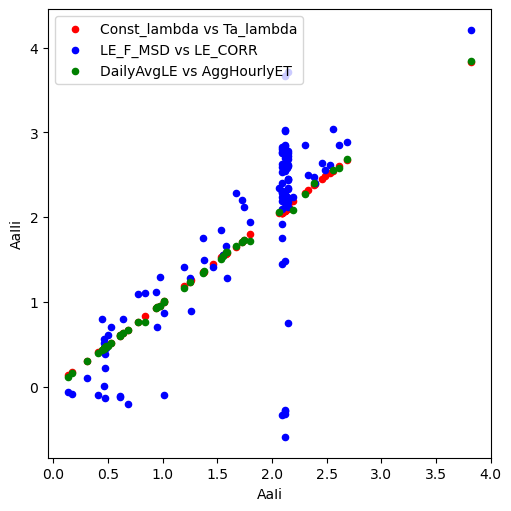

Data/FLUXNET/FLUXNET2022\US-xAE.csv


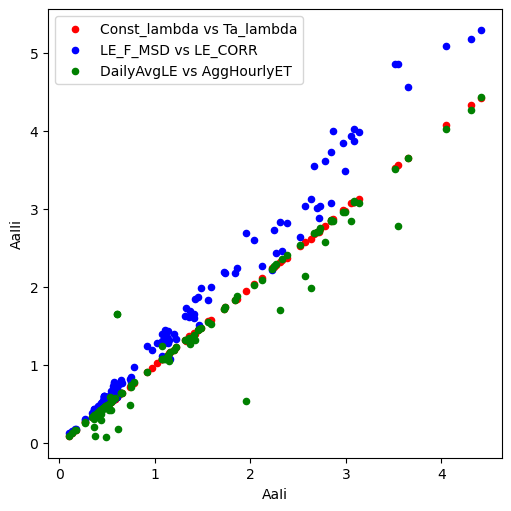

Data/FLUXNET/FLUXNET2022\US-xBA.csv


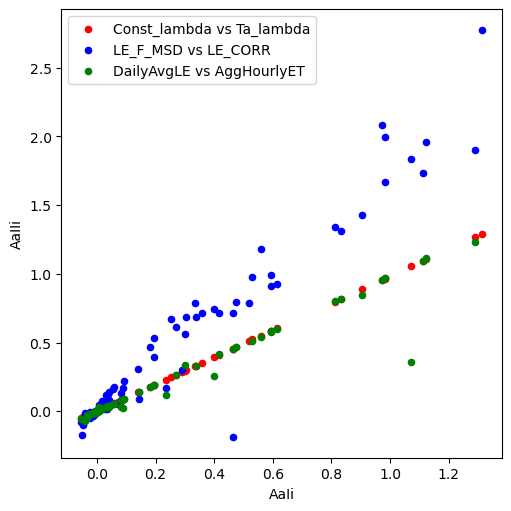

Data/FLUXNET/FLUXNET2022\US-xBL.csv


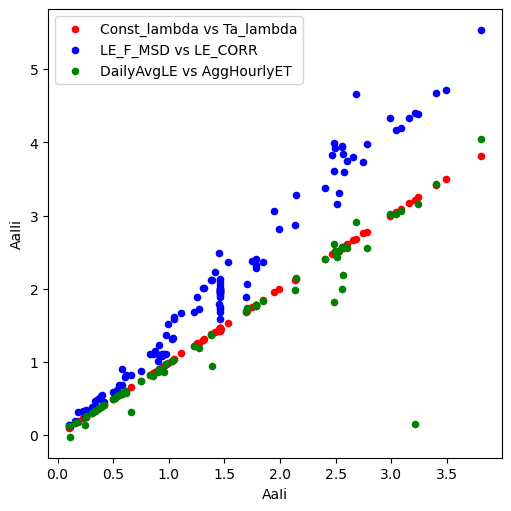

Data/FLUXNET/FLUXNET2022\US-xBN.csv


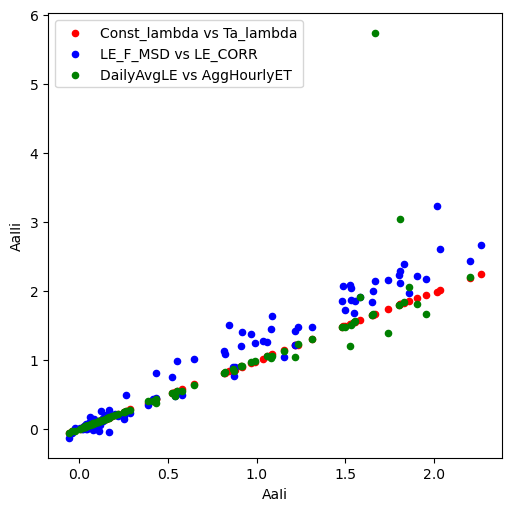

Data/FLUXNET/FLUXNET2022\US-xBR.csv


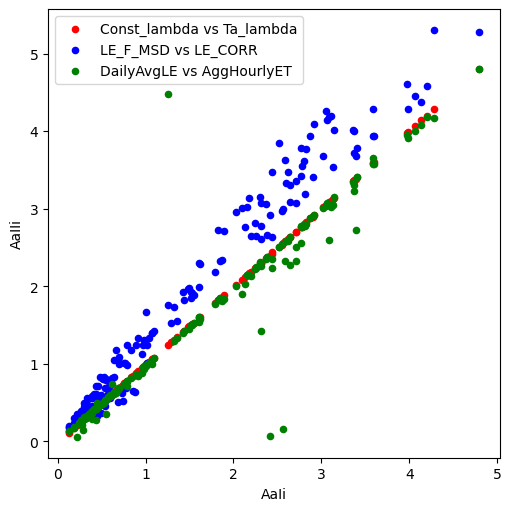

Data/FLUXNET/FLUXNET2022\US-xCL.csv


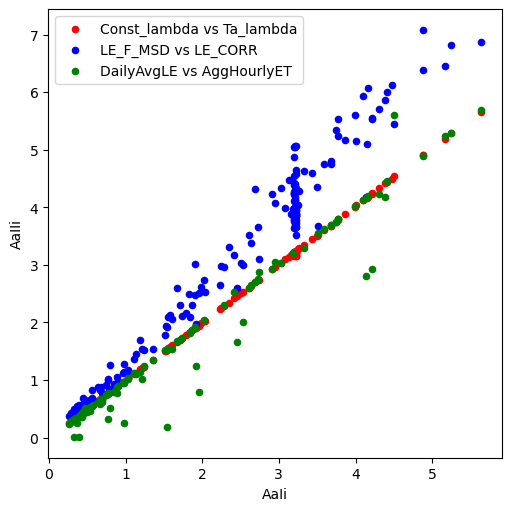

Data/FLUXNET/FLUXNET2022\US-xCP.csv


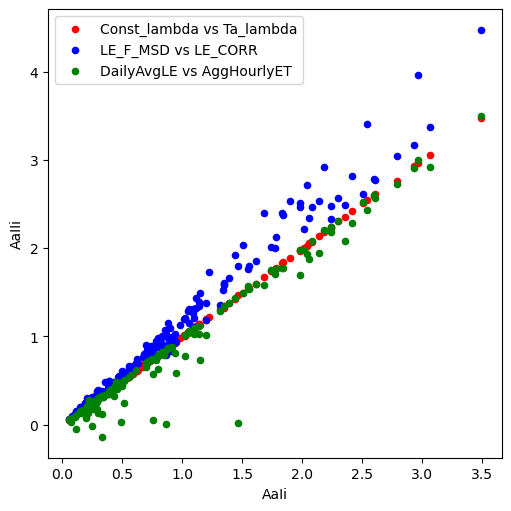

Data/FLUXNET/FLUXNET2022\US-xDC.csv


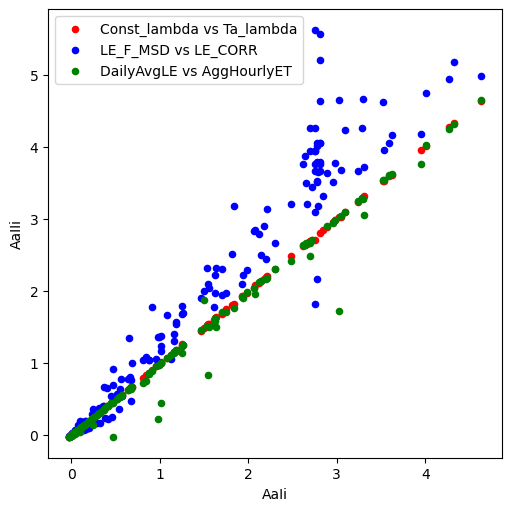

Data/FLUXNET/FLUXNET2022\US-xDJ.csv


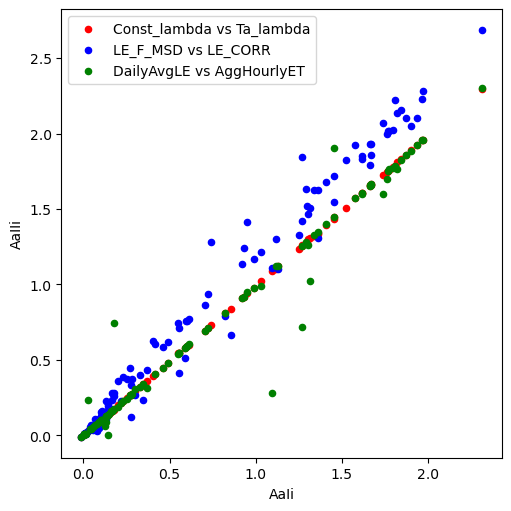

Data/FLUXNET/FLUXNET2022\US-xDL.csv


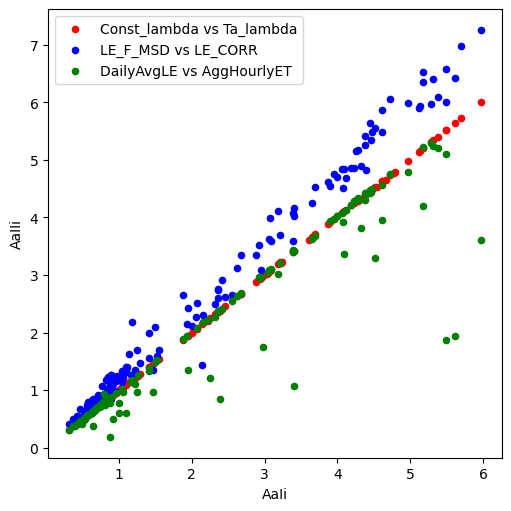

Data/FLUXNET/FLUXNET2022\US-xDS.csv


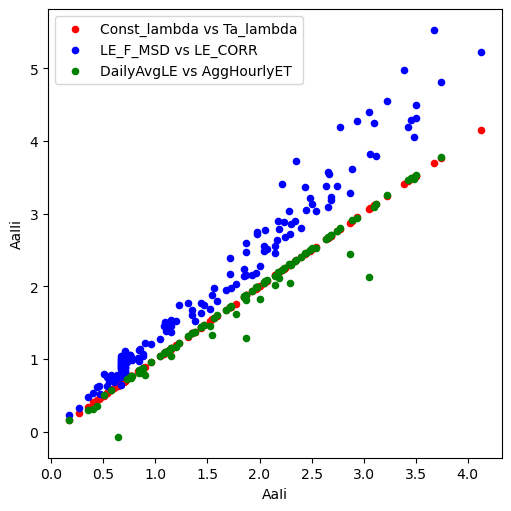

Data/FLUXNET/FLUXNET2022\US-xGR.csv


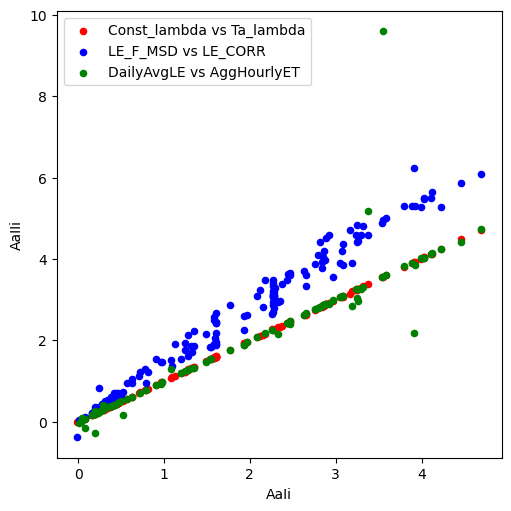

Data/FLUXNET/FLUXNET2022\US-xHA.csv


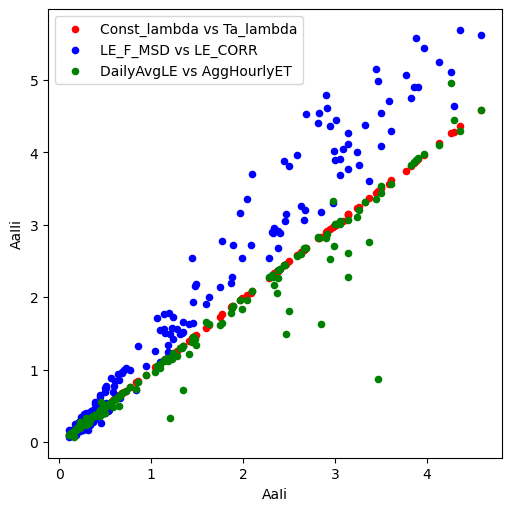

Data/FLUXNET/FLUXNET2022\US-xHE.csv


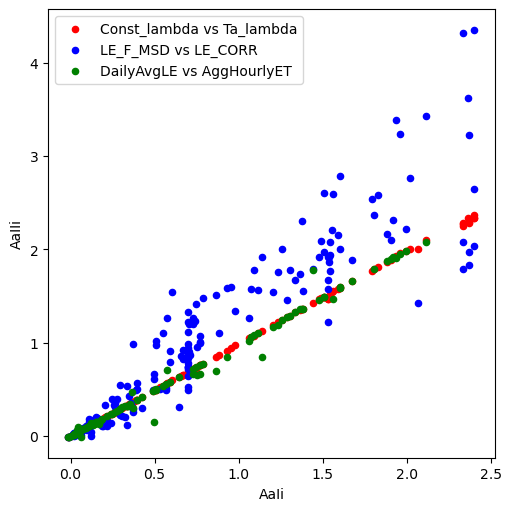

Data/FLUXNET/FLUXNET2022\US-xJE.csv


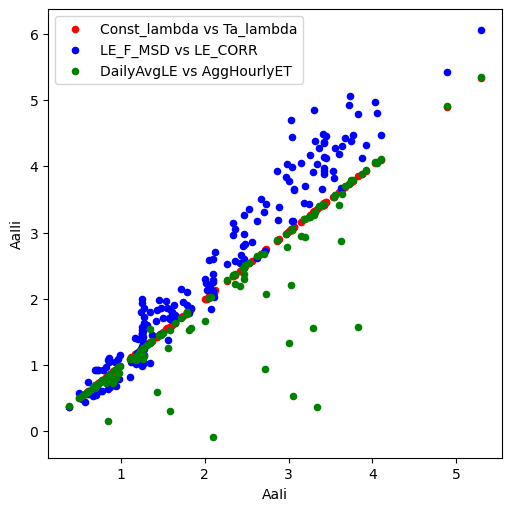

Data/FLUXNET/FLUXNET2022\US-xJR.csv


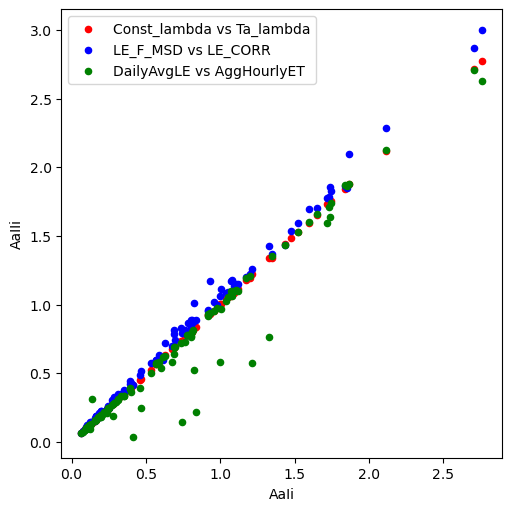

Data/FLUXNET/FLUXNET2022\US-xKA.csv


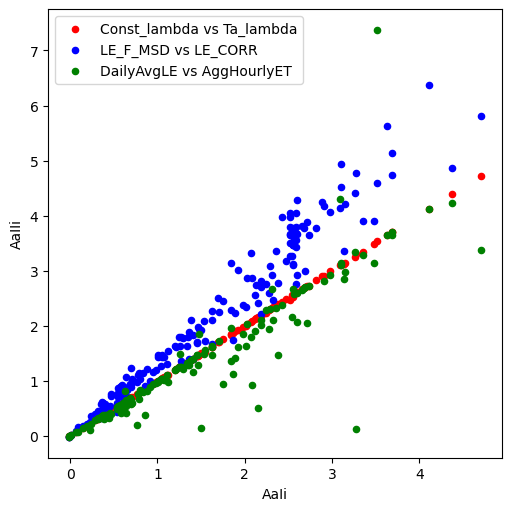

Data/FLUXNET/FLUXNET2022\US-xKZ.csv


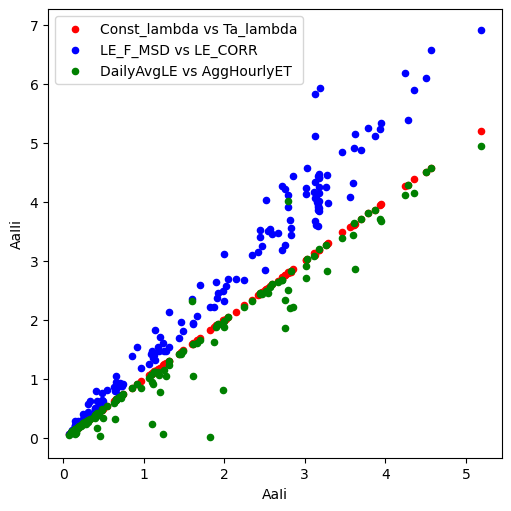

Data/FLUXNET/FLUXNET2022\US-xMB.csv


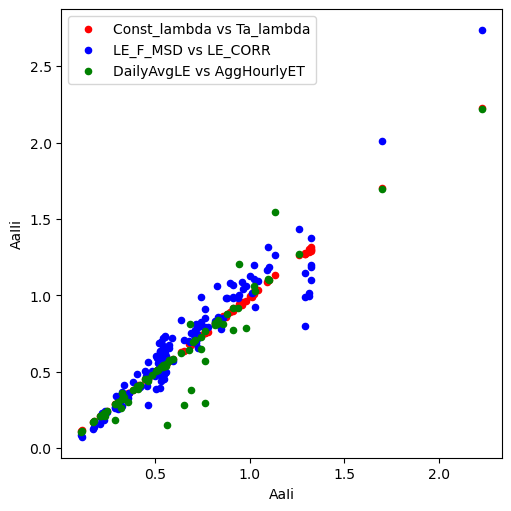

Data/FLUXNET/FLUXNET2022\US-xML.csv


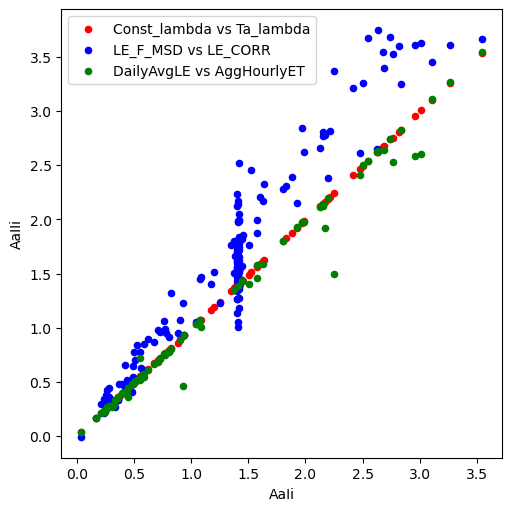

Data/FLUXNET/FLUXNET2022\US-xNG.csv


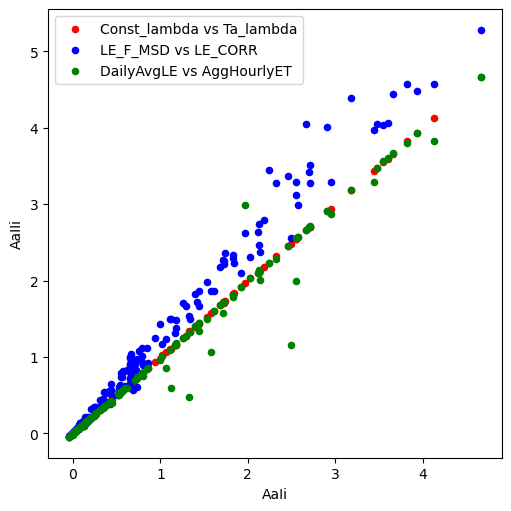

Data/FLUXNET/FLUXNET2022\US-xNQ.csv


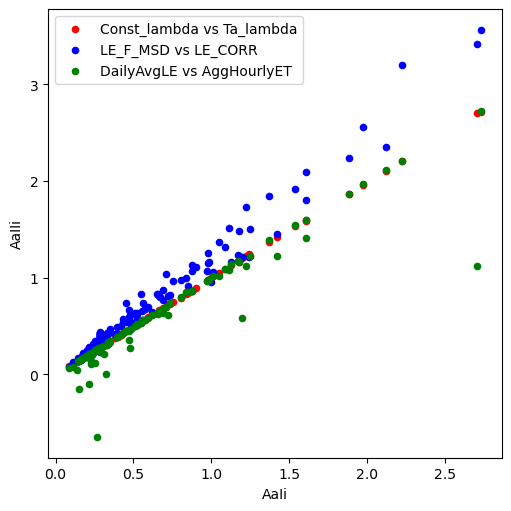

Data/FLUXNET/FLUXNET2022\US-xRM.csv


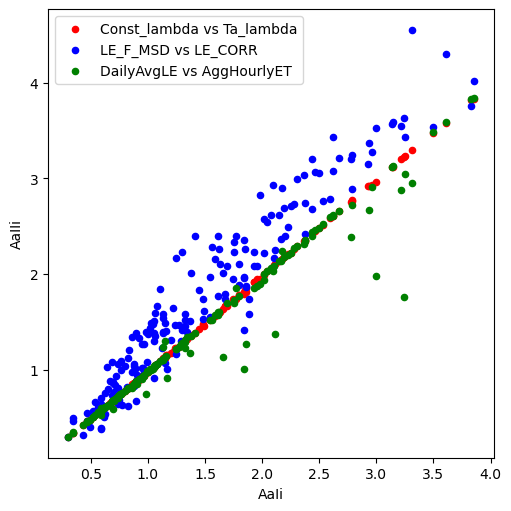

Data/FLUXNET/FLUXNET2022\US-xSB.csv


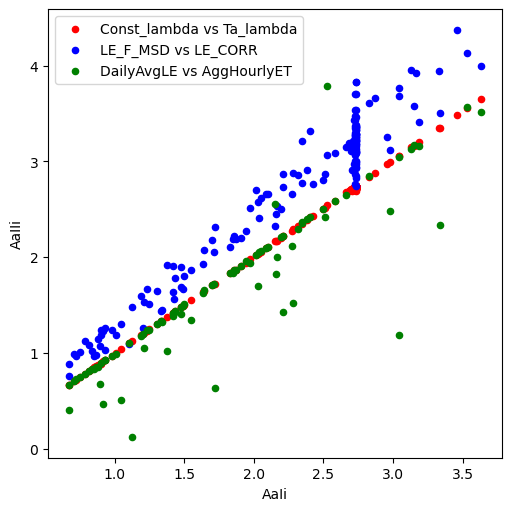

Data/FLUXNET/FLUXNET2022\US-xSC.csv


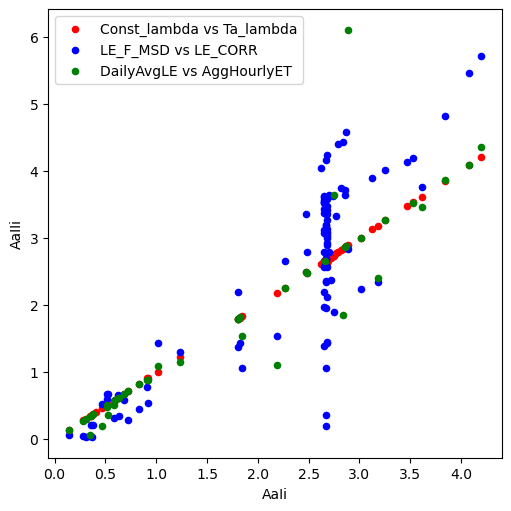

Data/FLUXNET/FLUXNET2022\US-xSE.csv


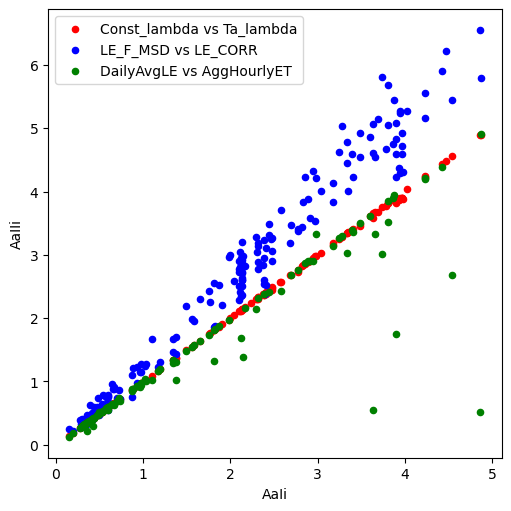

Data/FLUXNET/FLUXNET2022\US-xSJ.csv


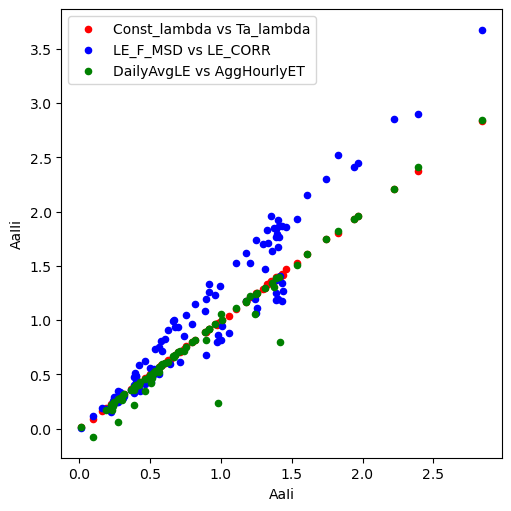

Data/FLUXNET/FLUXNET2022\US-xSL.csv


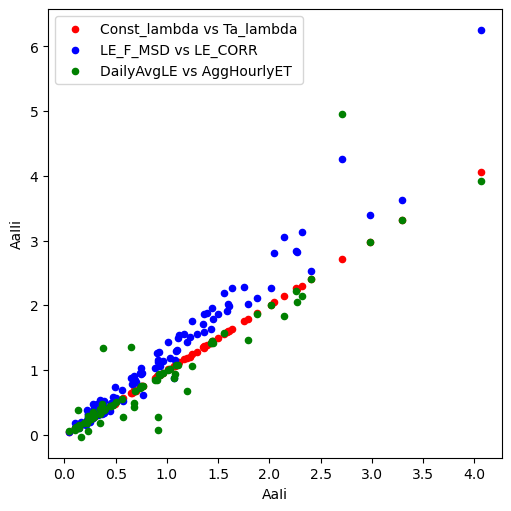

Data/FLUXNET/FLUXNET2022\US-xSR.csv


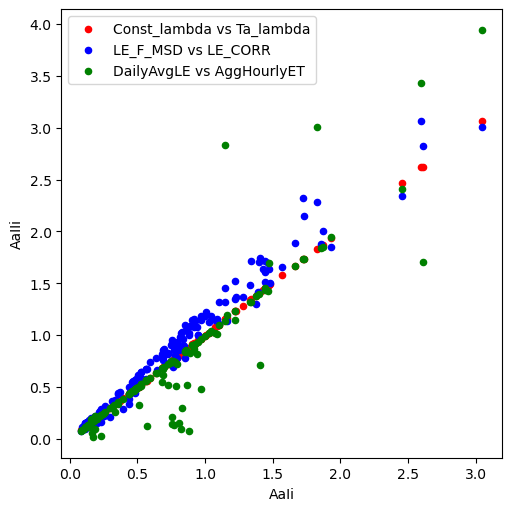

Data/FLUXNET/FLUXNET2022\US-xST.csv


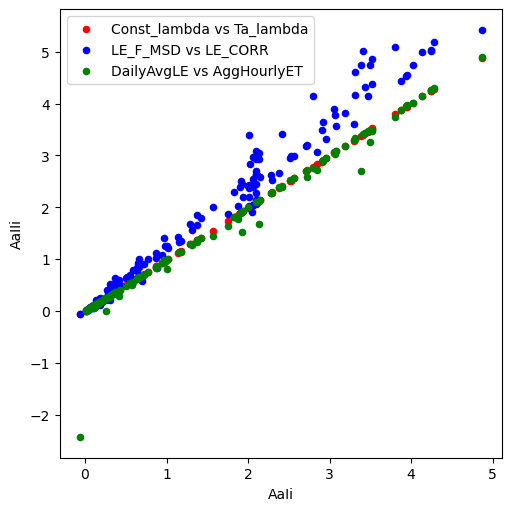

Data/FLUXNET/FLUXNET2022\US-xTA.csv


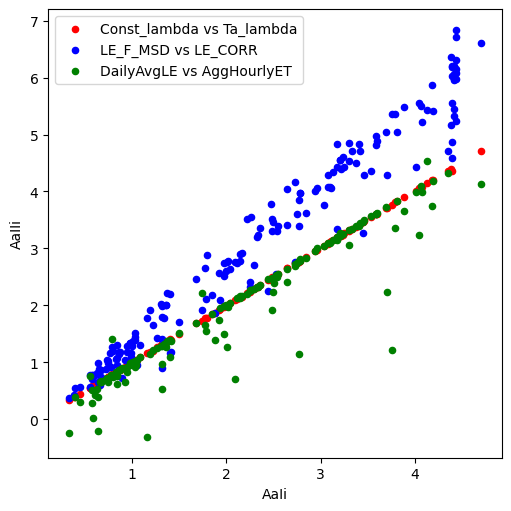

Data/FLUXNET/FLUXNET2022\US-xTR.csv


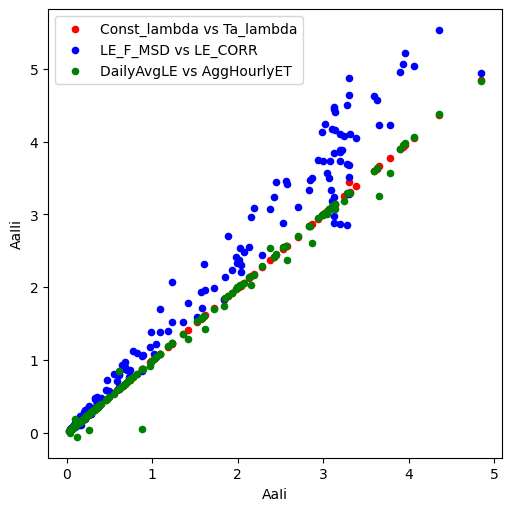

Data/FLUXNET/FLUXNET2022\US-xUK.csv


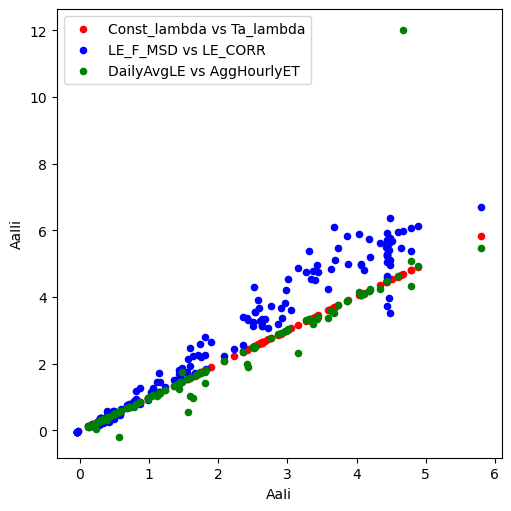

Data/FLUXNET/FLUXNET2022\US-xUN.csv


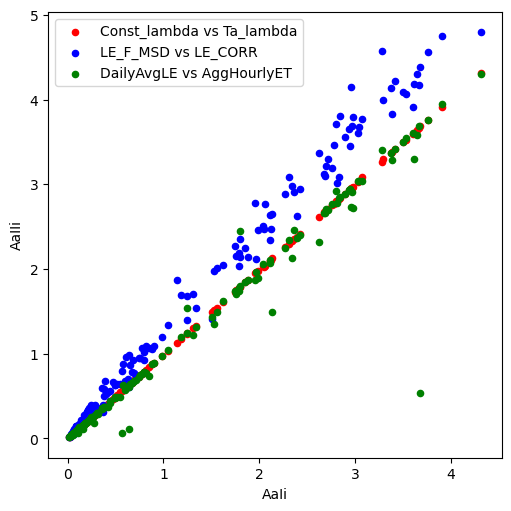

Data/FLUXNET/FLUXNET2022\US-xWD.csv


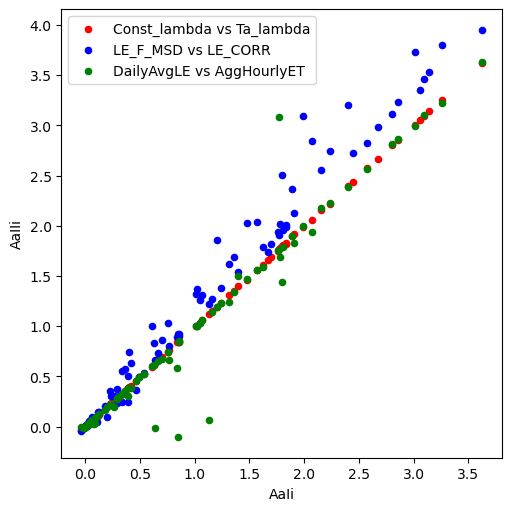

Data/FLUXNET/FLUXNET2022\US-xYE.csv


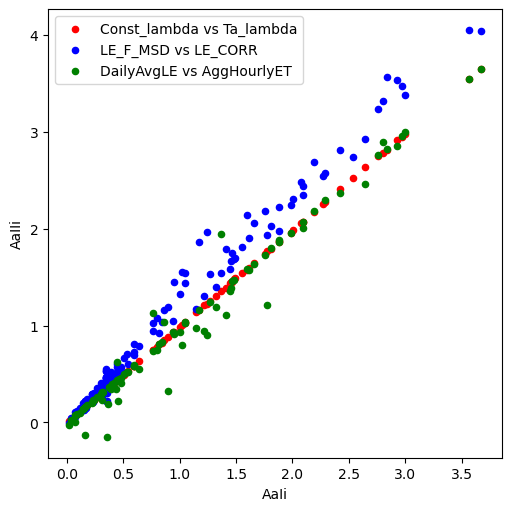

In [34]:
for fh in fhs:
    print(fh)
    df = pd.read_csv(fh,parse_dates=True,index_col=0)   
    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),
                            layout="constrained")
    df.plot.scatter(x='AaIi',y='AaIii',label='Const_lambda vs Ta_lambda',ax=axs,color='red')
    df.plot.scatter(x='AaIi',y='AbIi',label='LE_F_MSD vs LE_CORR',ax=axs,color='blue' )
    df.plot.scatter(x='AaIi',y='AaIIi',label='DailyAvgLE vs AggHourlyET',ax=axs,color='green' )
    plt.legend()
    plt.show()

## compare all stations, const_lambda vs Ta_lambda

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_3892\844748563.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('ET with constant $\lambda$ ($\mathregular{mm d^{-1}}$)')
C:\Users\ntr002\AppData\Local\Temp\ipykernel_3892\844748563.py:12: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('ET with temperature-dependent $\lambda$ ($\mathregular{mm d^{-1}}$)')


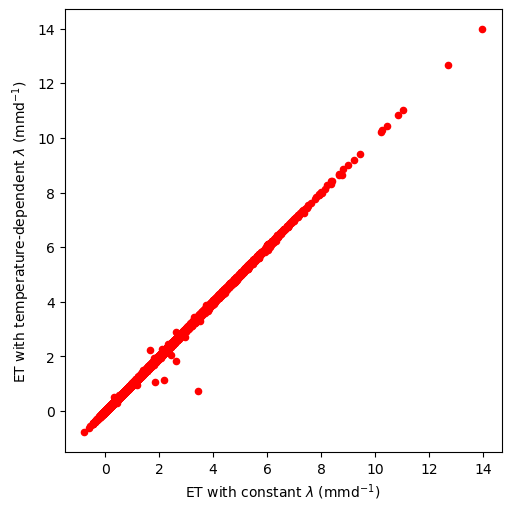

In [18]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),
                            layout="constrained")
for i,fh in enumerate(fhs):
    # print(fh)    
    df = pd.read_csv(fh,parse_dates=True,index_col=0)
    
    df.plot.scatter(x='AaIi',y='AaIii',ax=axs,color='red')
    # df.plot.scatter(x='AaIi',y='AbIi',label='LE_F_MSD vs LE_CORR',ax=axs,color='blue' )
    # df.plot.scatter(x='AaIi',y='AaIIi',label='DailyAvgLE vs AggHourlyET',ax=axs,color='green' )
# plt.legend()
plt.xlabel('ET with constant $\lambda$ ($\mathregular{mm d^{-1}}$)')
plt.ylabel('ET with temperature-dependent $\lambda$ ($\mathregular{mm d^{-1}}$)')
plt.savefig('../Figures/Compare_lambda_methods.png')
plt.show()

# Compute EB gap

In [42]:
EB_gaps= {}
for fh in fhs:
    station = fh.split('\\')[-1].split('.')[0]
    df = pd.read_csv(fh,parse_dates=True,index_col=0)    
    gaps=(df['AbIi']-df['AaIi'])*100/df['AaIi']
    EB_gaps[station]=gaps.describe()
df_EB_gaps=pd.DataFrame(EB_gaps)
df_EB_gaps


AR-TF1      AU-Adr      AU-ASM      AU-Boy      AU-Cpr      AU-Cum  \
count     0.0  108.000000  468.000000  216.000000  432.000000  324.000000   
mean      NaN    4.410920   20.391977   -1.057314   12.367210   24.889262   
std       NaN    5.151893    7.090601    7.925575    4.872689    7.025619   
min       NaN   -8.821375    1.633258  -19.813671   -6.117563    3.919199   
25%       NaN    1.477589   16.021942   -7.506661    9.401432   21.747707   
50%       NaN    4.394470   20.468141    1.160532   11.929776   25.380406   
75%       NaN    7.974407   25.232713    4.754092   15.249610   29.374508   
max       NaN   17.621465   43.982478   16.615350   26.834395   44.155882   

           AU-DaS      AU-Dry      AU-GWW      AU-Lit  ...      US-xSJ  \
count  540.000000  468.000000  360.000000  288.000000  ...  108.000000   
mean    11.576279   18.408251   18.965051   10.093352  ...   13.586163   
std     12.338187    8.680165    6.844007    9.111983  ...   21.686796   
min    -17.961629   -1.891961    2.181235  -12.746527  ...  -42.135159   
25%      4.117333   11.070820   14.243263    4.624785  ...   -7.268172   
50%     11.704518   19.127472   18.842964    9.791567  ...   20.460020   
75%     20.664298   25.145538   23.154401   16.528105  ...   32.358610   
max     36.579517   38.150465   36.853746   34.859741  ...   50.243393   

           US-xSL      US-xSR      US-xST      US-xTA      US-xTR      US-xUK  \
count  108.000000  180.000000  180.000000  179.000000  180.000000  180.000000   
mean    20.225044   11.295214   15.999019   30.096961   18.249248   14.703140   
std     20.542445   12.644907   22.180114   17.226241   17.381343   23.337087   
min    -29.862381  -28.823046  -35.430152  -31.905659  -33.143123  -45.062871   
25%      8.849722    3.782723    0.005067   22.403714    5.342986    0.577470   
50%     20.140270   13.567893   17.396018   34.729016   19.840666   18.190859   
75%     34.647672   21.638295   27.307399   40.615143   28.597332   28.434853   
max     71.285072   34.409799  132.656389   60.975179   68.036128   70.428317   

           US-xUN       US-xWD      US-xYE  
count  180.000000   108.000000  144.000000  
mean    24.139192     2.318544   17.930454  
std     16.811743   116.622275   20.533711  
min    -15.287073 -1163.283519 -134.622871  
25%     13.617424     0.524993   12.053297  
50%     22.230561    11.487177   16.747435  
75%     32.314375    28.675892   28.687320  
max     72.178603    87.051298   59.164189  

[8 rows x 217 columns]

In [43]:
df_EB_gaps.to_csv(f'Data/FLUXNET/FLUXNET2022_EBC.csv')

In [49]:
# Drop columns with any NaN values
df_cleaned = df_EB_gaps.dropna(axis=1)

# Transpose the DataFrame
df_transposed = df_cleaned.T

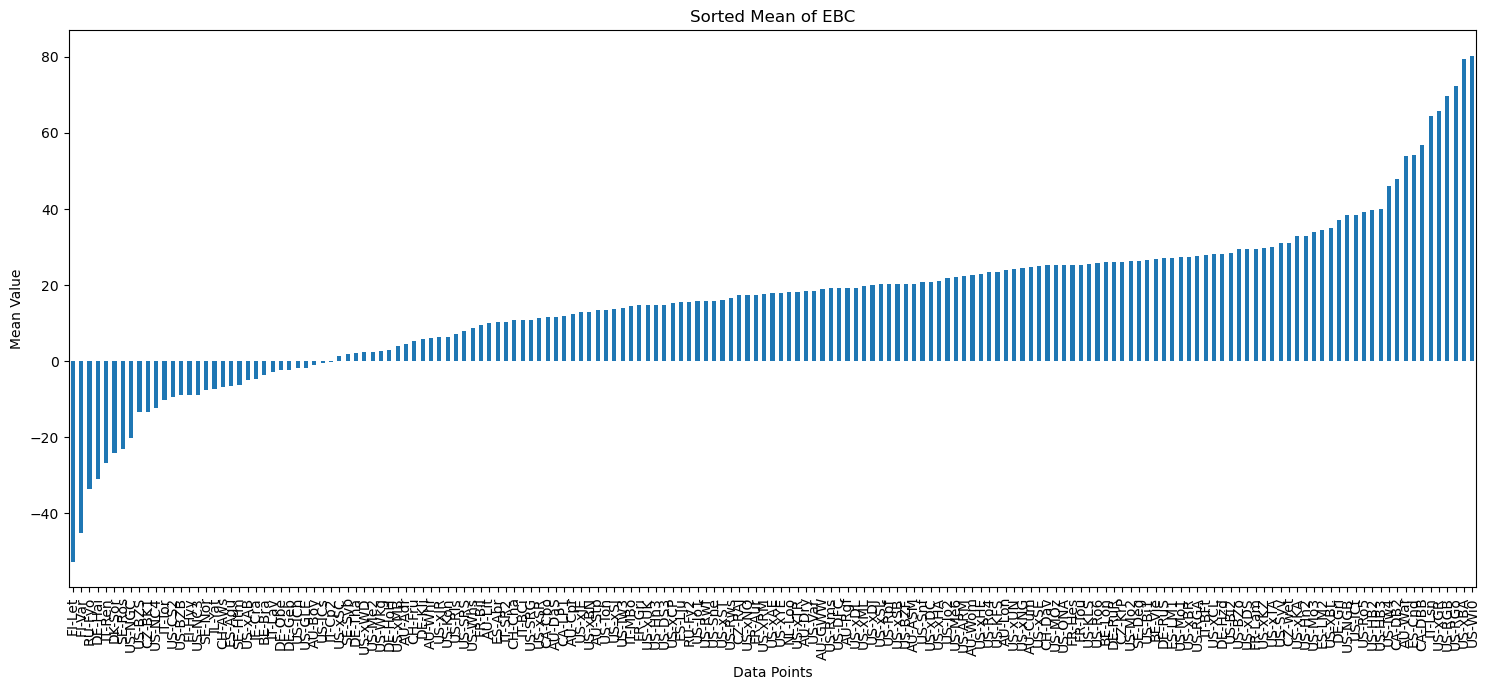

In [51]:
# Select and sort the 'mean' column from df_transposed
mean_sorted = df_transposed['mean'].sort_values()

# Plot the sorted 'mean'
plt.figure(figsize=(15, 7))
mean_sorted.plot(kind='bar')
plt.title('Sorted Mean of EBC')
plt.ylabel('Mean Value')
plt.xlabel('Data Points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()